## gini+数据处理

In [90]:
import pandas as pd
from inequalipy import *

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the segregation data
df_long = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result_1126.csv')

# 计算平均EDI，分组依据是city
average = df_long.groupby('category')[['social_accessibility']].mean()
average.columns = ['SA_mean']

gini_indices = df_long.groupby('category')['social_accessibility'].apply(lambda x: gini(x.values))
result = pd.concat([average, gini_indices], axis=1)

result.to_csv('./gini_index_poi_1126.csv', encoding='utf-8')

In [ ]:
import pandas as pd
# df = pd.read_csv('your_data.csv')
place_counts = df_long.groupby('place').size().reset_index(name='count')
place_counts.to_csv('place_counts.csv', index=False)

In [16]:
import pandas as pd

# 读取两个CSV文件
df_a = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\location_segregation_results_class2.csv', encoding='gbk')
df_b = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\place_counts.csv')

# 将数据b合并到数据a中，使用left join以保持数据a的所有行
# 以place列为键进行合并
merged_df = pd.merge(df_a, df_b, on='place', how='left')

# 将count的NaN值填充为0
merged_df['count'] = merged_df['count'].fillna(0)

# 保存合并后的结果到新的CSV文件
merged_df.to_csv('merged_result.csv', index=False)

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

# # 读取数据
# df = pd.read_csv('data.csv', sep='\t')

def calculate_diversity_metrics(group):
    # 获取类别计数
    category_counts = group['place_category'].value_counts()
    n = len(category_counts)
    total = category_counts.sum()
    
    # 计算比例
    proportions = category_counts / total
    
    # Shannon 多样性指数
    shannon = entropy(proportions)
    
    # Simpson 多样性指数
    simpson = 1 - sum(proportions ** 2)
    
    # Pielou 均匀度指数 (Shannon均匀度)
    pielou = shannon / np.log(n) if n > 1 else 0
    
    # 计算类别丰富度（总类别数）
    richness = n
    
    return pd.Series({
        '类别数量': richness,
        'Shannon指数': shannon,
        'Simpson指数': simpson,
        'Pielou均匀度': pielou,
        '总设施数': total
    })

# 按城市分组计算多样性指标
diversity_metrics = df_long.groupby('市').apply(calculate_diversity_metrics)

# 添加每个城市的类别构成
category_composition = df_long.groupby('市')['place_category'].value_counts().unstack(fill_value=0)

# 合并结果
final_results = pd.merge(
    diversity_metrics, 
    category_composition,
    left_index=True,
    right_index=True,
    how='left'
)

# print("\n城市多样性指标：")
final_results.to_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\01.csv')

# # 计算各指标的相关性
# correlation = final_results[['Shannon指数', 'Simpson指数', 'Pielou均匀度']].corr()
# print("\n多样性指标间的相关性：")
# print(correlation)

C:\Users\浩然\AppData\Local\Temp\ipykernel_44328\458844443.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity_metrics = df_long.groupby('市').apply(calculate_diversity_metrics)


C:\Users\浩然\AppData\Local\Temp\ipykernel_23056\3763913896.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['City'] = df_filtered['市'].map(city_name_mapping)
C:\Users\浩然\AppData\Local\Temp\ipykernel_23056\3763913896.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['City'] = pd.Categorical(df_filtered['City'], categories=[city_name_mapping[city] for city in top_10_cities], ordered=True)
C:\Users\浩然\AppData\Local\Temp\ipykernel_23056\3763913896.py:51: FutureWarning: 

Passing `p

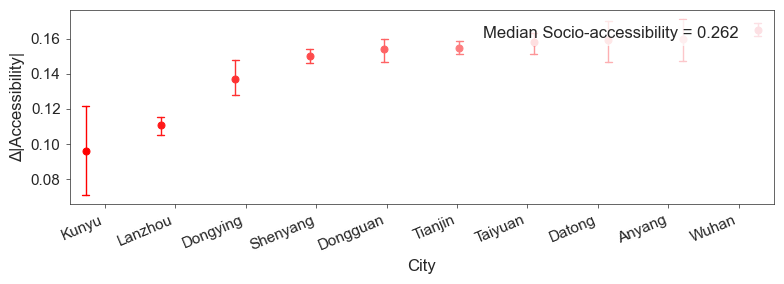

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# 读取数据
df_long = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\merged_result.csv', encoding='gbk')
# 去除"乐东黎族自治县"
df_long = df_long[df_long['市'] != '乐东黎族自治县']
# df_long = df_long[df_long['市'] != '昆玉市']

# 设置主题
sns.set_theme(style="ticks")

# 计算每个城市的中位数并排序
category_medians = df_long.groupby('市')['segregation_abs_normalized'].median().sort_values(ascending=True)

# 选择前10个城市
top_10_cities = category_medians.head(10).index

# 创建中英文城市名称映射
city_name_mapping = {
    '昆玉市': 'Kunyu',
    '包头市': 'Baotou',
    '兰州市': 'Lanzhou',
    '东营市': 'Dongying',
    '沈阳市': 'Shenyang',
    '东莞市': 'Dongguan',
    '天津市': 'Tianjin',
    '太原市': 'Taiyuan',
    '大同市': 'Datong',
    '安阳市': 'Anyang',
    '武汉市': 'Wuhan'
}

# 筛选数据
df_filtered = df_long[df_long['市'].isin(top_10_cities)]

# 添加英文城市名列
df_filtered['City'] = df_filtered['市'].map(city_name_mapping)

# 根据中位数排序类别
df_filtered['City'] = pd.Categorical(df_filtered['City'], categories=[city_name_mapping[city] for city in top_10_cities], ordered=True)

custom_cmap = LinearSegmentedColormap.from_list("custom_red_white", ['#FF0000', '#FCE0E4'])

# 初始化图形
f, ax = plt.subplots(figsize=(8, 3))

# 绘制点图
g = sns.pointplot(
    data=df_filtered, 
    x="City", 
    y="segregation_abs_normalized", 
    dodge=.8 - .8 / 3,
    palette=custom_cmap(np.linspace(0, 1, len(top_10_cities))),
    errorbar='ci',
    markers="o",
    markersize=5,
    linestyle="none",
    estimator='median',
    capsize=0.1,
    linewidth=1
)

for spine in g.spines.values():
    spine.set_linewidth(0.5)
g.tick_params(width=0.5, length=3)
g.legend(frameon=False)

plt.setp(g.get_xticklabels(), rotation=23, ha='right')

# 添加平均值虚线
# place_median = df_long['segregation_abs'].median()
# median_line = g.axhline(place_median, color='k', linestyle='--', linewidth=1, label=f'Mean Segregation = {place_median:.3f}')

# 设置标签
plt.xlabel('City', fontsize=12)
plt.ylabel('Δ|Accessibility|', fontsize=12)

# 添加 "mean=2035" 标签
plt.text(0.95, 0.92, 'Median Socio-accessibility = 0.262', transform=ax.transAxes, ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# 显示图形
plt.tight_layout()
# plt.savefig(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\figure\city_seg_top10.svg', bbox_inches='tight')
plt.show()

In [14]:
import pandas as pd
import numpy as np

# 读取数据
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\socio_acc_china_corr2.csv', encoding='gbk')  # 假设数据保存在 data.csv 中

# 计算前25%和后25%分位点的索引
q1_index = int(len(df) * 0.25)
q3_index = int(len(df) * 0.75)

# 按GDP从小到大排序
df_sorted = df.sort_values('GDP')

# 获取GDP最低的25%城市
bottom_25 = df_sorted.iloc[:q1_index]

# 获取GDP最高的25%城市
top_25 = df_sorted.iloc[q3_index:]

# 计算这两组城市的socio-accessibility中位数
bottom_median = bottom_25['socio-accessibility'].mean()
top_median = top_25['socio-accessibility'].mean()

print(f"GDP最低25%城市的socio-accessibility中位数: {bottom_median}")
print(f"GDP最高25%城市的socio-accessibility中位数: {top_median}")

# # 打印这些城市的名称和具体数值
# print("\nGDP最低25%的城市:")
# for _, city in bottom_25.iterrows():
#     print(f"{city['city']}: GDP={city['GDP']}, socio-accessibility={city['socio-accessibility']}")

# print("\nGDP最高25%的城市:")
# for _, city in top_25.iterrows():
#     print(f"{city['city']}: GDP={city['GDP']}, socio-accessibility={city['socio-accessibility']}")

GDP最低25%城市的socio-accessibility中位数: 0.3022176059848485
GDP最高25%城市的socio-accessibility中位数: 0.25952746789552233


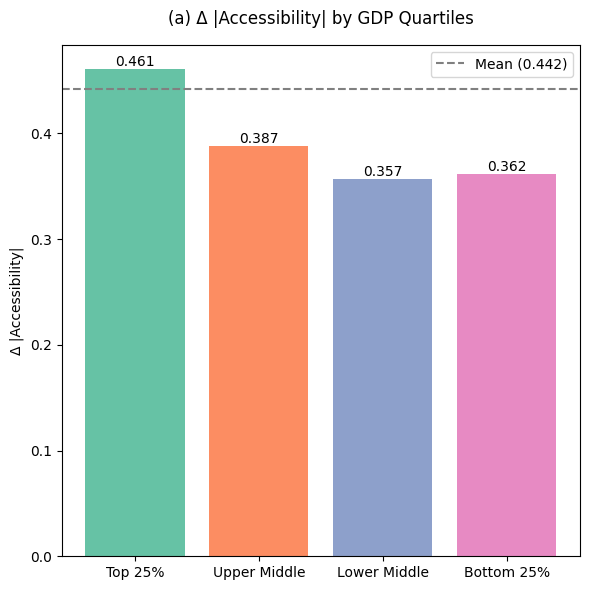

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格
# plt.style.use('seaborn')
colors = sns.color_palette('Set2')

# 读取数据
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\socio_acc_china_corr2.csv', encoding='gbk')

# 计算分位点索引
q1_index = int(len(df) * 0.25)
q2_index = int(len(df) * 0.5) 
q3_index = int(len(df) * 0.75)

# 按GDP排序
df_sorted = df.sort_values('GDP')

# X = 'socio-accessibility'
X = 'abs_different'

# 获取四个分组
bottom_25 = df_sorted.iloc[:q1_index]
lower_middle = df_sorted.iloc[q1_index:q2_index]
upper_middle = df_sorted.iloc[q2_index:q3_index]
top_25 = df_sorted.iloc[q3_index:]

# 计算每组的socio-accessibility均值
means = [
    top_25[X].median(),
    upper_middle[X].median(), 
    lower_middle[X].median(),
    bottom_25[X].median()
]

# 计算总体平均值
total_mean = df[X].median()

# 创建图形
plt.figure(figsize=(6,6))

# 绘制柱状图，使用Set2颜色
bars = plt.bar(['Top 25%', 'Upper Middle', 'Lower Middle', 'Bottom 25%'], 
               means, 
               color=colors)

# 添加水平线表示平均值
plt.axhline(y=0.442, color='gray', linestyle='--', label=f'Mean (0.442)')

# 在柱子上添加具体数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

# 设置标题和标签
plt.title('(a) Δ |Accessibility| by GDP Quartiles', pad=15)
# plt.ylabel('Socio-accessibility')
plt.ylabel('Δ |Accessibility|')
# plt.ylim(0,0.35)
# 添加图例
plt.legend()

# 调整布局
plt.tight_layout()

plt.show()

In [52]:
df

,市,city,cities,code,Area,socio-accessibility,gini,diversity,abs_different,Pop (million),...,人口规模,人口密度,经济发展水平,对外开放水平,城镇化水平,科学技术水平,人力资本水平,市场化水平,房价,GDP
0,上海市,上海,Shanghai,310000,Eastern,0.266204,0.336109,2.250642,0.515242,24.8900,...,7.201745,7.657292,10.751885,0.077466,0.7552,0.010288,0.035394,1.041519,53203.857140,432150000
1,深圳市,深圳,Shenzhen,440300,Eastern,0.330580,0.312024,2.266178,0.438696,17.7910,...,5.016816,6.650033,10.906781,0.103569,0.5829,0.004377,0.045624,1.196046,57313.000000,306650000
2,广州市,广州,Guangzhou,440100,Eastern,0.216728,0.410331,2.219081,0.541615,18.8106,...,6.586434,6.882950,10.786676,0.061086,0.4771,0.005628,0.120589,0.475692,34249.571430,282320000
3,重庆市,重庆,Chongqing,500000,Western,0.234002,0.392133,2.290969,0.397093,32.1200,...,8.048820,5.939776,8.996776,0.011442,0.4190,0.002537,0.037787,0.893444,11872.428570,278940000
4,苏州市,苏州,Suzhou,320500,Eastern,0.303408,0.331968,2.270471,0.380680,12.8478,...,6.381765,6.545694,10.772540,0.201052,0.4908,0.002166,0.025832,0.657533,21888.857140,227180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,丽江市,丽江,Lijiang,530700,Western,0.331371,0.286049,1.842125,0.397200,1.2540,...,4.717427,3.965185,8.219326,0.003898,0.2032,0.007939,0.011087,0.575106,8312.428571,414050
261,三亚市,三亚,Sanya,460200,Eastern,0.264951,0.381127,1.992813,0.564148,1.0561,...,3.919793,5.570556,9.016270,0.375790,0.4711,0.001717,0.039990,0.662298,29293.142860,411659
262,林芝市,林芝,Linzhi,540400,Western,0.356941,0.312949,1.796401,0.250432,0.2380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7931.000000,87215
263,日喀则市,日喀则,Rikaze,540200,Western,0.274866,0.385878,1.697285,0.198945,0.8700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7696.000000,43495


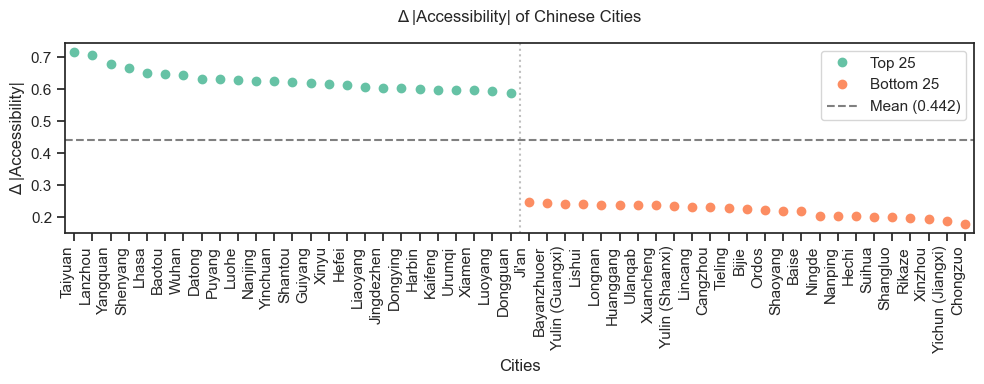

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格
colors = sns.color_palette('Set2')

# 读取数据
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\socio_acc_china_corr2.csv', encoding='gbk')

# 按gini排序并选择前10个和后10个城市
df_sorted = df.sort_values('abs_different', ascending=False)
top_10 = df_sorted.head(25)
bottom_10 = df_sorted.tail(25)
selected_data = pd.concat([top_10, bottom_10])

# 创建图形
plt.figure(figsize=(10, 4))

# 绘制前10个城市的点
g1 = sns.pointplot(
    data=top_10,
    x="cities",
    y="abs_different",
    markers="o",
    markersize=5,
    linestyle="none",
    color=colors[0],
    label='Top 25'
)

# 绘制后10个城市的点
g2 = sns.pointplot(
    data=bottom_10,
    x="cities",
    y="abs_different",
    markers="o",
    markersize=5,
    linestyle="none",
    color=colors[1],
    label='Bottom 25'
)

# 添加平均线
plt.axhline(y=0.442, color='gray', linestyle='--', label=f'Mean (0.442)')

# 在两组城市之间添加垂直分隔线
plt.axvline(x=24.5, color='gray', linestyle=':', alpha=0.5)

# 设置图形样式
plt.xticks(rotation=90, ha='right')
plt.title('Δ |Accessibility| of Chinese Cities', pad=15)
plt.xlabel('Cities')
plt.ylabel('Δ |Accessibility|')
plt.legend()
plt.tight_layout()

plt.show()

In [16]:
from scipy import stats
import pandas as pd
# 读取 CSV 数据
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')

def anova_test(df, group_col, value_col):
    groups = df[group_col].unique()
    data = [df[df[group_col] == group][value_col] for group in groups]
    f_value, p_value = stats.f_oneway(*data)
    return f_value, p_value

f_value, p_value = anova_test(df, 'category', 'abs_difference')
print(f"ANOVA结果：F值 = {f_value:.4f}, p值 = {p_value:.4f}")

ANOVA结果：F值 = 1395.2750, p值 = 0.0000


In [12]:
df

,node,geohash,place,lat,lng,segregation,place_category,segregation_abs,省,省代码,市,市代码,count,segregation_abs_normalized,category,accessibility,difference,abs_difference,distance,Area
0,loc_1927·鲁迅与内山纪念书局,wtw3u7f,1927·鲁迅与内山纪念书局,31.266743,121.479122,0.853908,"science, education, and cultural services",0.853908,上海市,310000.0,上海市,310000.0,0,0.146095,SECS,0.805084,0.658989,0.658989,2.125515,Eastern
1,loc_三门峡,wqpjf7m,三门峡,34.779318,111.200545,0.963880,tourist attractions,0.963880,河南省,410000.0,三门峡市,411200.0,5014,0.036121,TA,0.740694,0.704574,0.704574,1.816411,Central
2,loc_亚龙湾热带天堂森林公园,w7jzzhm,亚龙湾热带天堂森林公园,18.260903,109.651758,0.939853,tourist attractions,0.939853,海南省,460000.0,三亚市,460200.0,1127,0.060148,TA,0.795996,0.735848,0.735848,13.624935,Eastern
3,loc_三亚凤凰岛,w7jzg9u,三亚凤凰岛,18.247167,109.496080,0.769548,tourist attractions,0.769548,海南省,460000.0,三亚市,460200.0,1000,0.230456,TA,0.877724,0.647267,0.647267,3.055457,Eastern
4,loc_亚龙湾国家旅游度假区,w7jzy6d,亚龙湾国家旅游度假区,18.251874,109.613479,0.750007,tourist attractions,0.750007,海南省,460000.0,三亚市,460200.0,3543,0.249999,TA,0.826388,0.576389,0.576389,9.601105,Eastern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412491,loc_LeSerein诗城暮色,wtsk2e9,LeSerein诗城暮色,31.704491,118.501017,0.678250,tourist attractions,0.678250,安徽省,340000.0,马鞍山市,340500.0,8,0.321757,TA,0.906396,0.584640,0.584640,2.264614,Central
412492,loc_黄冈中等职业学校,wt3tpwj,黄冈中等职业学校,30.444369,114.946765,-0.397362,"science, education, and cultural services",0.397362,湖北省,420000.0,黄冈市,421100.0,2,0.602650,SECS,0.599400,-0.003250,0.003250,3.853493,Central
412494,loc_徽杭大酒店康泰店,wtsk0ku,徽杭大酒店康泰店,31.667896,118.493100,0.068268,accommodation services,0.068268,安徽省,340000.0,马鞍山市,340500.0,4,0.931751,ACS,0.912812,-0.018939,0.018939,3.148171,Central
412497,loc_天龙国际广场,wtc5dk6,天龙国际广场,32.982515,114.009068,-0.414530,commercial buildings,0.414530,河南省,410000.0,驻马店市,411700.0,2,0.585482,CB,0.717728,0.132246,0.132246,3.739589,Central


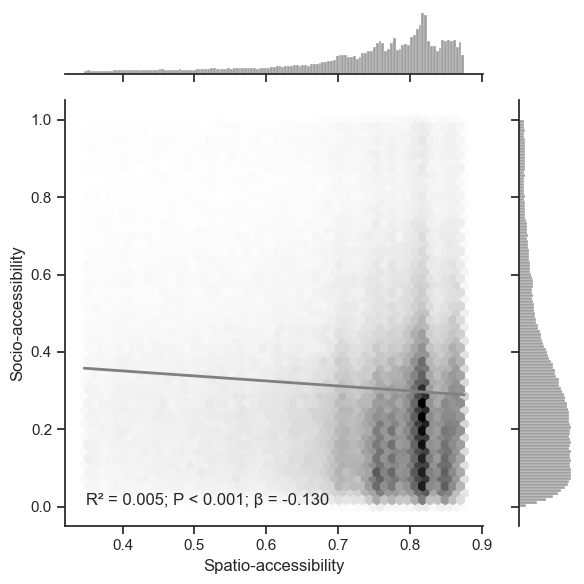

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression
from adjustText import adjust_text

# 设置风格
sns.set_theme(style="ticks", palette='Set2')

# 准备数据
x_v = 'segregation_abs_normalized'
x = 'accessibility'

df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')
df = df.dropna()

q_low = df[x].quantile(0.05)
q_hi = df[x].quantile(0.95)
df_clean = df[(df[x] > q_low) & (df[x] < q_hi)]

# 计算统计值
X = df_clean[x].values.reshape(-1, 1)
y_data = df_clean[x_v].values
model = LinearRegression()
results = model.fit(X, y_data)
r2 = model.score(X, y_data)
coefficient = model.coef_[0]
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean[x], df_clean[x_v])

# 创建jointplot
g = sns.jointplot(data=df_clean, x=x, y=x_v, kind="hex", color="gray")

# 在joint_ax上添加回归线
sns.regplot(data=df_clean, x=x, y=x_v, 
            scatter=False,
            color='gray',
            line_kws={'linestyle': '-', 'linewidth': 2},
            ax=g.ax_joint)

# 添加统计信息
if p_value < 0.001:
    p_value_text = "P < 0.001"
else:
    p_value_text = f"P = {p_value:.3f}"

g.ax_joint.text(0.05, 0.05, f'R² = {r2:.3f}; {p_value_text}; β = {coefficient:.3f}', 
        transform=g.ax_joint.transAxes, fontsize=12)

# g.ax_joint.set_ylabel('Δ |Accessibility|', fontsize=12)
g.ax_joint.set_ylabel('Socio-accessibility', fontsize=12)
# g.ax_joint.set_xlabel('Distance to City Center (km)', fontsize=12)
g.ax_joint.set_xlabel('Spatio-accessibility', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\浩然\AppData\Local\Temp\ipykernel_8548\51452203.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=count_data, x='Urban Agglomeration', y='Δ |Accessibility|', palette='Set2', )


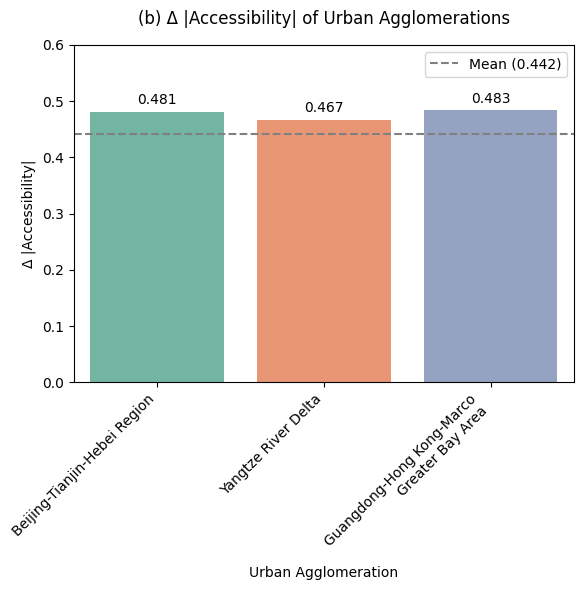

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# 读取数据
# df_long = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\merged_result.csv', encoding='gbk')
df_long = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')

selected_cities1 = ['北京市',  '天津市', '河北省']
selected_cities2 = ['上海市', '江苏省', '安徽省', '浙江省']
selected_cities3 = ['广东省', '香港', '澳门']
df_filtered = df_long[df_long['省'].isin(selected_cities3)]
df_filtered['abs_difference'].median()

count_data = pd.DataFrame({
    'Urban Agglomeration': [
        'Beijing-Tianjin-Hebei Region', 'Yangtze River Delta',
        'Guangdong-Hong Kong-Marco\nGreater Bay Area'],
    'Δ |Accessibility|': [
        0.4814046066046171, 0.4670907289498714, 0.4834383057788627]
})
# count_data
mean = df_long['abs_difference'].mean()

colors = sns.color_palette('Set2')
plt.figure(figsize=(6,6))

# 绘制柱状图，使用Set2颜色
bars = sns.barplot(data=count_data, x='Urban Agglomeration', y='Δ |Accessibility|', palette='Set2', )
for i in bars.containers:
    bars.bar_label(i, fmt='%.3f', padding=3)
plt.title('(b) Δ |Accessibility| of Urban Agglomerations', pad=15)
plt.xticks(rotation=45, ha='right') # ha='right'使文字右对齐，更美观
plt.axhline(y=mean, color='gray', linestyle='--', label=f'Mean ({mean:.3f})')
plt.ylim(0,0.6)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\浩然\AppData\Local\Temp\ipykernel_8548\3744294344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_long, x='Area', y='abs_difference', palette='Set2', )


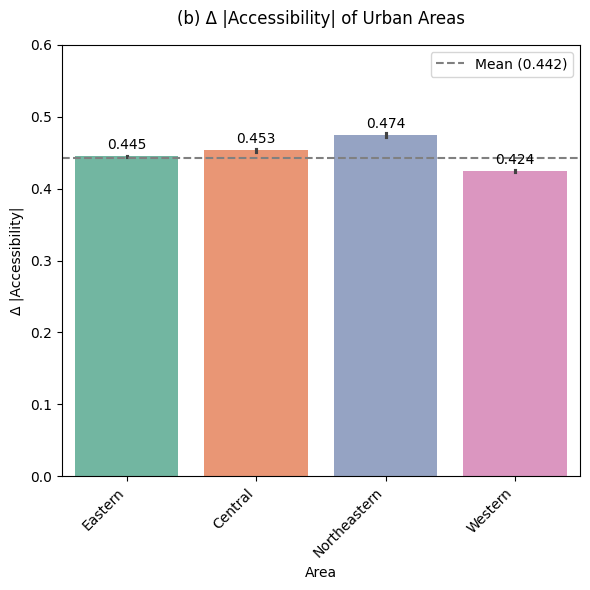

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

df_long = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')

mean = df_long['abs_difference'].mean()

colors = sns.color_palette('Set2')
plt.figure(figsize=(6,6))

# 绘制柱状图，使用Set2颜色
bars = sns.barplot(data=df_long, x='Area', y='abs_difference', palette='Set2', )
for i in bars.containers:
    bars.bar_label(i, fmt='%.3f', padding=3)
plt.axhline(y=mean, color='gray', linestyle='--', label=f'Mean ({mean:.3f})')
plt.title('(b) Δ |Accessibility| of Urban Areas', pad=15)
plt.xticks(rotation=45, ha='right') # ha='right'使文字右对齐，更美观
plt.ylabel('Δ |Accessibility|')
plt.ylim(0,0.6)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\浩然\AppData\Local\Temp\ipykernel_7492\908120619.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['City'] = df_filtered['市'].map(city_name_mapping)
C:\Users\浩然\AppData\Local\Temp\ipykernel_7492\908120619.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['City'] = pd.Categorical(df_filtered['City'],
C:\Users\浩然\AppData\Local\Temp\ipykernel_7492\908120619.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

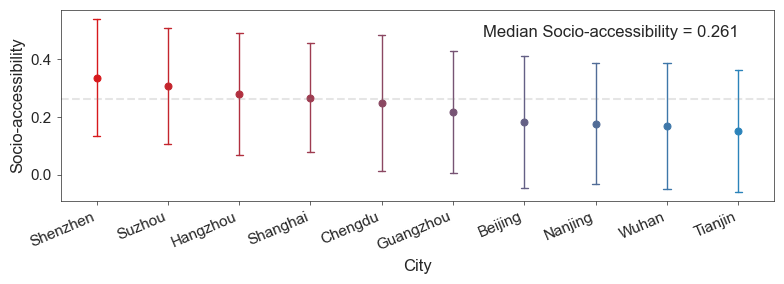

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# 读取数据
# df_long = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\merged_result.csv', encoding='gbk')
df_long = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')

# 指定要筛选的城市列表
selected_cities = ['北京市', '上海市', '深圳市', '广州市', '杭州市', 
                  '南京市', '苏州市', '武汉市', '成都市', '天津市']

# 创建中英文城市名称映射
city_name_mapping = {
    '北京市': 'Beijing',
    '上海市': 'Shanghai',
    '深圳市': 'Shenzhen',
    '广州市': 'Guangzhou',
    '杭州市': 'Hangzhou',
    '南京市': 'Nanjing',
    '苏州市': 'Suzhou',
    '武汉市': 'Wuhan',
    '成都市': 'Chengdu',
    '天津市': 'Tianjin'
}

# 筛选数据
df_filtered = df_long[df_long['市'].isin(selected_cities)]

# 计算每个城市的中位数并排序
category_medians = df_filtered.groupby('市')['segregation_abs_normalized'].median().sort_values(ascending=False)

# 添加英文城市名列
df_filtered['City'] = df_filtered['市'].map(city_name_mapping)

# 根据中位数排序类别
df_filtered['City'] = pd.Categorical(df_filtered['City'], 
                                   categories=[city_name_mapping[city] for city in category_medians.index], 
                                   ordered=True)

# 设置主题和颜色
sns.set_theme(style="ticks")
custom_cmap = LinearSegmentedColormap.from_list("custom_red_white", ['#D7191C', '#2B83BA'])
# custom_cmap = LinearSegmentedColormap.from_list("custom_red_white", ['#FF0000', '#FCE0E4'])

# 初始化图形
f, ax = plt.subplots(figsize=(8, 3))

# 绘制点图
g = sns.pointplot(
    data=df_filtered, 
    x="City", 
    y="segregation_abs_normalized", 
    # dodge=.8 - .8 / 3,
    palette=custom_cmap(np.linspace(0, 1, len(selected_cities))),
    errorbar='sd',
    markers="o",
    markersize=5,
    linestyle="none",
    estimator='median',
    capsize=0.1,
    linewidth=1
)

# 设置图形样式
for spine in g.spines.values():
    spine.set_linewidth(0.5)
g.tick_params(width=0.5, length=3)
g.legend(frameon=False)

plt.setp(g.get_xticklabels(), rotation=23, ha='right')

# 设置标签
plt.xlabel('City', fontsize=12)
plt.ylabel('Socio-accessibility', fontsize=12)

# 添加中位数标签
plt.text(0.95, 0.92, 'Median Socio-accessibility = 0.261', 
         transform=ax.transAxes, ha='right', va='top', fontsize=12, 
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
g.axhline(df_long['segregation_abs_normalized'].median(), color='gray', linestyle='--', alpha=0.2)
# 显示图形
plt.tight_layout()
# plt.savefig(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\figure\city_seg_top10.svg', 
#             bbox_inches='tight')
plt.show()

In [38]:
category_medians

市
深圳市    0.337289
苏州市    0.307317
杭州市    0.278720
上海市    0.266745
成都市    0.248944
广州市    0.217878
北京市    0.182298
南京市    0.177699
武汉市    0.168966
天津市    0.152334
Name: segregation_abs_normalized, dtype: float64

In [86]:
df_long['social_accessibility'].mean()

0.18577521133760017

In [5]:
category_medians = df_long.groupby('市')['abs_difference'].median().sort_values(ascending=False)
median_df = pd.DataFrame(category_medians).reset_index()
median_df.columns = ['市', '中位数']

# 保存到CSV文件
median_df.to_csv('city_medians.csv', index=False, encoding='utf-8-sig')

C:\Users\浩然\AppData\Local\Temp\ipykernel_20980\518284493.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['City'] = df_filtered['市'].map(city_name_mapping)
C:\Users\浩然\AppData\Local\Temp\ipykernel_20980\518284493.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['City'] = pd.Categorical(df_filtered['City'],
C:\Users\浩然\AppData\Local\Temp\ipykernel_20980\518284493.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

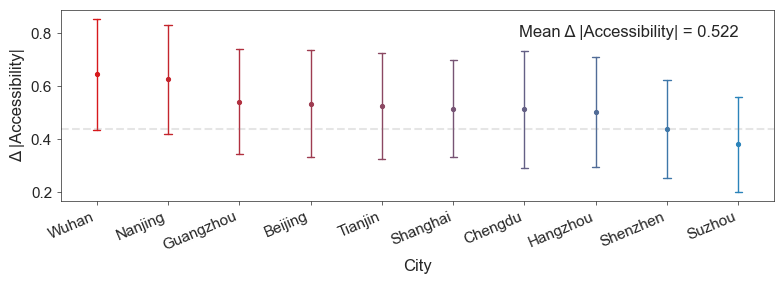

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# 读取数据
# df_long = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\merged_result.csv', encoding='gbk')
df_long = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')

# 指定要筛选的城市列表
selected_cities = ['北京市', '上海市', '深圳市', '广州市', '杭州市', 
                  '南京市', '苏州市', '武汉市', '成都市', '天津市']

# 创建中英文城市名称映射
city_name_mapping = {
    '北京市': 'Beijing',
    '上海市': 'Shanghai',
    '深圳市': 'Shenzhen',
    '广州市': 'Guangzhou',
    '杭州市': 'Hangzhou',
    '南京市': 'Nanjing',
    '苏州市': 'Suzhou',
    '武汉市': 'Wuhan',
    '成都市': 'Chengdu',
    '天津市': 'Tianjin'
}

# 筛选数据
df_filtered = df_long[df_long['市'].isin(selected_cities)]

# 计算每个城市的中位数并排序
category_medians = df_filtered.groupby('市')['abs_difference'].median().sort_values(ascending=False)

# 添加英文城市名列
df_filtered['City'] = df_filtered['市'].map(city_name_mapping)

# 根据中位数排序类别
df_filtered['City'] = pd.Categorical(df_filtered['City'], 
                                   categories=[city_name_mapping[city] for city in category_medians.index], 
                                   ordered=True)

# 设置主题和颜色
sns.set_theme(style="ticks")
custom_cmap = LinearSegmentedColormap.from_list("custom_red_white", ['#D7191C', '#2B83BA'])
# custom_cmap = LinearSegmentedColormap.from_list("custom_red_white", ['#FF0000', '#FCE0E4'])

# 初始化图形
f, ax = plt.subplots(figsize=(8, 3))

# 绘制点图
g = sns.pointplot(
    data=df_filtered, 
    x="City", 
    y="abs_difference", 
    # dodge=.8 - .8 / 3,
    palette=custom_cmap(np.linspace(0, 1, len(selected_cities))),
    errorbar='sd',
    markers="o",
    markersize=3,
    linestyle="none",
    estimator='median',
    capsize=0.1,
    linewidth=1
)

# 设置图形样式
for spine in g.spines.values():
    spine.set_linewidth(0.5)
g.tick_params(width=0.5, length=3)
g.legend(frameon=False)

plt.setp(g.get_xticklabels(), rotation=23, ha='right')

# 设置标签
plt.xlabel('City', fontsize=12)
plt.ylabel('Δ |Accessibility|', fontsize=12)

# 添加中位数标签
plt.text(0.95, 0.92, 'Mean Δ |Accessibility| = 0.522', 
         transform=ax.transAxes, ha='right', va='top', fontsize=12, 
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
g.axhline(df_long['abs_difference'].mean(), color='gray', linestyle='--', alpha=0.2)
# 显示图形
plt.tight_layout()
# plt.savefig(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\figure\city_seg_top10.svg', 
#             bbox_inches='tight')
plt.show()

C:\Users\浩然\AppData\Local\Temp\ipykernel_21636\1555872440.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['cities'] = selected_data['市'].map(city_name_mapping)
C:\Users\浩然\AppData\Local\Temp\ipykernel_21636\1555872440.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(
C:\Users\浩然\AppData\Local\Temp\ipykernel_21636\1555872440.py:46: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  chart = sns.barplot(
C:\Users\浩然\AppData\Local\Temp\ipykernel_21636\1555872440.py:58: UserWarning: No

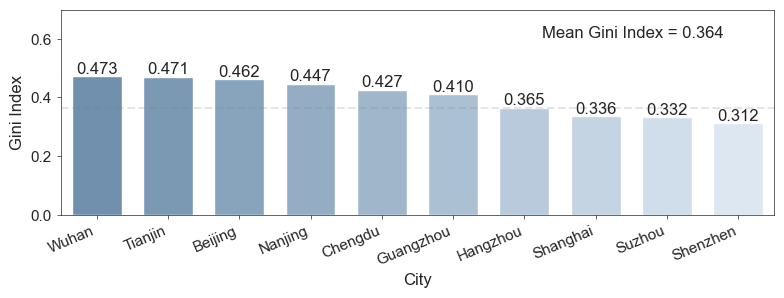

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import textwrap

# 设置Seaborn样式
sns.set_theme(style="ticks")

# 读取CSV文件
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\gini_index_city.csv')

# 指定要筛选的城市
selected_cities = ['北京市', '上海市', '深圳市', '广州市', '杭州市', 
                  '南京市', '苏州市', '武汉市', '成都市', '天津市']


# 创建中英文城市名称映射
city_name_mapping = {
    '北京市': 'Beijing',
    '上海市': 'Shanghai',
    '深圳市': 'Shenzhen',
    '广州市': 'Guangzhou',
    '杭州市': 'Hangzhou',
    '南京市': 'Nanjing',
    '苏州市': 'Suzhou',
    '武汉市': 'Wuhan',
    '成都市': 'Chengdu',
    '天津市': 'Tianjin'
}

# 筛选指定城市的数据
selected_data = df[df['市'].isin(selected_cities)]
# 添加英文城市名列
selected_data['cities'] = selected_data['市'].map(city_name_mapping)

# 按GINI值排序
selected_data = selected_data.sort_values('gini', ascending=False)

# 创建颜色映射
custom_cmap = LinearSegmentedColormap.from_list("custom_red_white", ['#6690B7', '#D8E7F5'])

# 创建图形
plt.figure(figsize=(8, 3.2))
chart = sns.barplot(
    data=selected_data,
    x="cities",
    y="gini",
    palette=custom_cmap(np.linspace(0, 1, len(selected_cities))),
    width=0.7
)

# 设置图形样式
for spine in chart.spines.values():
    spine.set_linewidth(0.5)
chart.tick_params(width=0.5, length=3)
chart.legend(frameon=False)

# 设置标签
plt.xlabel("City", fontsize=12)
plt.ylabel("Gini Index", fontsize=12)

# 设置y轴范围
chart.set_ylim(0, 0.7)

# 处理x轴标签
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=23, ha='right')

wrap_labels(plt.gca(), 10)

# 在柱子上添加数值标签
for i, v in enumerate(selected_data['gini']):
    chart.text(i, v, f'{v:.3f}', ha='center', va='bottom')

# 添加平均值标签
mean_gini = df['gini'].mean()
plt.text(0.93, 0.92, f'Mean Gini Index = {mean_gini:.3f}', 
         transform=chart.transAxes, ha='right', va='top', fontsize=12, 
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

chart.axhline(df['gini'].mean(), color='gray', linestyle='--', alpha=0.2)

# 调整布局并保存
plt.tight_layout()
plt.savefig(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\figure\gini_top10.svg', 
            dpi=600, bbox_inches='tight')
plt.show()

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from inequalipy import *
import pandas as pd
import numpy as np

# Load the segregation data
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\merged_result.csv', encoding='gbk')

In [19]:
import pandas as pd
import numpy as np
from math import sqrt
from tqdm import tqdm
from collections import defaultdict

def euclidean_distance(lat1, lon1, lat2, lon2):
    return sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

def calculate_accessibility(distance, beta=1.5):
    # 重力模型: A = e^(-β*d)
    # beta控制距离衰减的速率，beta越大衰减越快
    return np.exp(-beta * distance)

def calculate_place_accessibility(df, batch_size=50, beta=1.5):
    accessibility_sum = defaultdict(float)
    accessibility_count = defaultdict(int)
    
    for city in tqdm(df['市'].unique(), desc='Processing cities'):
        city_df = df[df['市'] == city]
        
        residential = city_df[city_df['place_category'] == 'real estate communities']
        other_places = city_df[city_df['place_category'] != 'real estate communities']
        
        if len(residential) == 0 or len(other_places) == 0:
            continue
            
        total_batches = (len(residential) + batch_size - 1) // batch_size
        for i in tqdm(range(0, len(residential), batch_size), 
                     desc=f'Processing {city}', 
                     total=total_batches):
            batch_residential = residential.iloc[i:i+batch_size]
            
            for _, res in batch_residential.iterrows():
                for _, dest in other_places.iterrows():
                    distance = euclidean_distance(
                        res['lat'], res['lng'],
                        dest['lat'], dest['lng']
                    )
                    if distance == 0:
                        distance = 0.001
                    
                    accessibility = calculate_accessibility(distance, beta)
                    accessibility_sum[dest['node']] += accessibility
                    accessibility_count[dest['node']] += 1
    
    result_df = pd.DataFrame([
        {'place': node, 'accessibility': accessibility_sum[node] / accessibility_count[node]}
        for node in accessibility_sum.keys()
    ])
    
    return result_df

# 计算结果
results = calculate_place_accessibility(df, batch_size=50, beta=1.5)  # beta参数可以调整

# 保存结果
results.to_csv('place_accessibility.csv', index=False)

# 显示前几行结果
print("\n结果示例:")
print(results.head())

Processing cities: 100%|██████████| 365/365 [3:55:10<00:00, 38.66s/it]



结果示例:
                place  accessibility
0  loc_1927·鲁迅与内山纪念书局       0.805084
1           loc_召稼楼古镇       0.727409
2          loc_豫园-九曲桥       0.814606
3         loc_上海迪士尼乐园       0.694310
4            loc_黄兴公园       0.770809


## regression

d:\miniconda3\envs\torch\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
  warnings.warn(message)
d:\miniconda3\envs\torch\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
  warnings.warn(message)
d:\miniconda3\envs\torch\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
  warnings.warn(message)
d:\miniconda3\envs\torch\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
  warnings.warn(message)
d:\miniconda3\envs\torch\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  warnings.warn(message)
d:\miniconda3\en

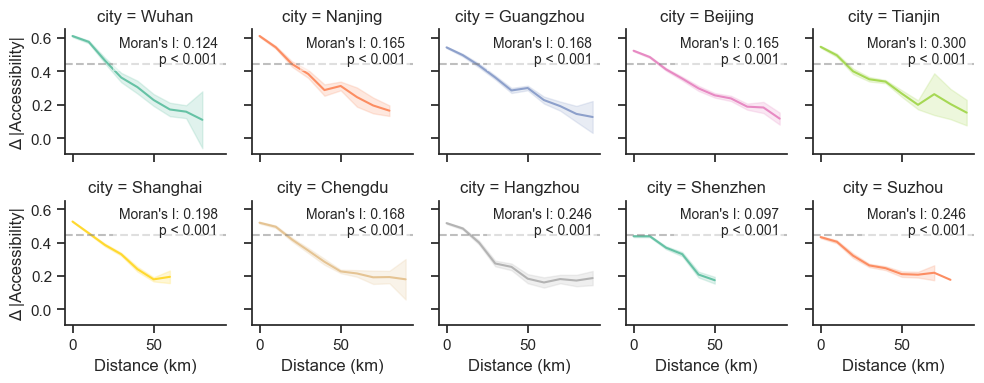

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2
from libpysal import weights
import esda

def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

def global_morans_i(df, column, k=5):
    coords = df[['lng', 'lat']].values
    knn = weights.KNN.from_array(coords, k=k)
    moran = esda.moran.Moran(df[column], knn)
    return moran

# 按照指定顺序排列城市
city_order = ['Wuhan', 'Nanjing', 'Guangzhou', 'Beijing', 'Tianjin', 
              'Shanghai', 'Chengdu', 'Hangzhou', 'Shenzhen', 'Suzhou']

# 城市中心坐标和名称映射
city_data = {
    'Beijing': {'coords': (39.9299857781, 116.395645038), 'chinese': '北京市'},
    'Shanghai': {'coords': (31.24916171, 121.487899486), 'chinese': '上海市'},
    'Shenzhen': {'coords': (22.5460535462, 114.025973657), 'chinese': '深圳市'},
    'Guangzhou': {'coords': (23.1200491021, 113.307649675), 'chinese': '广州市'},
    'Hangzhou': {'coords': (30.2592444615, 120.219375416), 'chinese': '杭州市'},
    'Nanjing': {'coords': (32.0572355018, 118.778074408), 'chinese': '南京市'},
    'Suzhou': {'coords': (31.317987368, 120.619907115), 'chinese': '苏州市'},
    'Wuhan': {'coords': (30.5810841269, 114.316200103), 'chinese': '武汉市'},
    'Chengdu': {'coords': (30.6799428454, 104.067923463), 'chinese': '成都市'},
    'Tianjin': {'coords': (39.1439299033, 117.210813092), 'chinese': '天津市'}
}

# 读取数据
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')
df = df[df['category'] != 'AI']

# 计算整体的平均abs_difference
overall_mean = df['abs_difference'].mean()

# 创建空列表存储所有城市的数据
all_data = []
moran_i_values = {}

# 处理每个城市的数据
for city_eng, city_info in city_data.items():
    df_city = df[df['市'] == city_info['chinese']].copy()
    
    # 计算距离
    df_city['distance'] = df_city.apply(
        lambda row: calculate_distance(
            city_info['coords'][0], city_info['coords'][1],
            row['lat'], row['lng']
        ),
        axis=1
    )
    
    # 计算莫兰指数
    moran = global_morans_i(df_city, 'abs_difference', k=5)
    moran_i_values[city_eng] = {'I': moran.I, 'p_value': moran.p_sim}
    
    # 创建距离分段
    buffer_distances = np.arange(0, 101, 10)
    
    for i in range(len(buffer_distances)-1):
        start_dist = buffer_distances[i]
        end_dist = buffer_distances[i+1]
        
        mask = (df_city['distance'] >= start_dist) & (df_city['distance'] < end_dist)
        mean_value = df_city[mask]['abs_difference'].mean()
        std_value = df_city[mask]['abs_difference'].std()
        count = df_city[mask]['abs_difference'].count()
        
        if not np.isnan(mean_value):
            ci_95 = 1.96 * std_value / np.sqrt(count) if count > 0 else 0
            all_data.append({
                'city': city_eng,
                'distance': start_dist,
                'mean_value': mean_value,
                'ci_95_lower': mean_value - ci_95,
                'ci_95_upper': mean_value + ci_95,
                'count': count
            })

# 创建DataFrame
plot_df = pd.DataFrame(all_data)

# 将city列转换为分类型变量并指定顺序
plot_df['city'] = pd.Categorical(plot_df['city'], categories=city_order, ordered=True)

# 设置样式
sns.set_theme(style="ticks")

# Create FacetGrid with Set2 color palette
colors = sns.color_palette("Set2", n_colors=10)
city_colors = dict(zip(city_order, colors))

g = sns.FacetGrid(plot_df, 
                  col="city", 
                  col_wrap=5, 
                  height=2,
                  col_order=city_order)

# Plot curves and confidence intervals
for ax, (city, data) in zip(g.axes, plot_df.groupby('city')):
    color = city_colors[city]
    
    # Plot line and confidence interval
    ax.plot(data['distance'], data['mean_value'], color=color)
    ax.fill_between(data['distance'],
                   data['ci_95_lower'],
                   data['ci_95_upper'],
                   alpha=0.2,
                   color=color)
    
    # Add overall mean line
    ax.axhline(y=overall_mean, color='gray', linestyle='--', alpha=0.5)
    
    # Add Moran's I stats with white background
    moran_i = moran_i_values[city]['I']
    p_value = moran_i_values[city]['p_value']
    ax.text(0.95, 0.95,
            f'Moran\'s I: {moran_i:.3f}\np < {p_value:.3f}',
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    
    ax.set_xlabel('Distance (km)')
    ax.set_ylabel('Δ |Accessibility|')
    ax.set_title(f'city = {city}')

plt.tight_layout()
plt.show()

In [41]:
# 城市中心坐标字典
city_centers = {
    '上海': [121.487899486, 31.24916171],
    '临沧': [100.092612914, 23.8878061038],
    '丽江': [100.229628399, 26.8753510895],
    '保山': [99.1779956133, 25.1204891962],
    '大理白族自治州': [100.223674789, 25.5968996394],
    '德宏傣族景颇族自治州': [98.5894342874, 24.441239663],
    '怒江傈僳族自治州': [98.8599320425, 25.8606769782],
    '文山壮族苗族自治州': [104.246294318, 23.3740868504],
    '昆明': [102.714601139, 25.0491531005],
    '昭通': [103.725020656, 27.3406329636],
    '普洱': [100.98005773, 22.7887777801],
    '曲靖': [103.782538888, 25.5207581429],
    '楚雄彝族自治州': [101.529382239, 25.0663556742],
    '玉溪': [102.545067892, 24.3704471344],
    '红河哈尼族彝族自治州': [103.384064757, 23.3677175165],
    '西双版纳傣族自治州': [100.803038275, 22.0094330022],
    '迪庆藏族自治州': [99.7136815989, 27.8310294612],
    '乌兰察布': [113.112846391, 41.0223629468],
    '乌海': [106.831999097, 39.6831770068],
    '兴安盟': [122.048166514, 46.0837570652],
    '包头': [109.846238532, 40.6471194257],
    '呼伦贝尔': [119.760821794, 49.2016360546],
    '呼和浩特': [111.66035052, 40.8283188731],
    '巴彦淖尔': [107.42380672, 40.7691799024],
    '赤峰': [118.930761192, 42.2971123203],
    '通辽': [122.260363263, 43.633756073],
    '鄂尔多斯': [109.993706251, 39.8164895606],
    '锡林郭勒盟': [116.027339689, 43.9397048423],
    '阿拉善盟': [105.695682871, 38.8430752644],
    '北京': [116.395645038, 39.9299857781],
    '台中': [119.337634104, 26.0911937119],
    '台北': [114.130474436, 22.3748329286],
    '台南': [121.360525873, 38.9658447898],
    '嘉义': [114.246701335, 22.7288657203],
    '高雄': [111.590952812, 21.9464822541],
    '吉林': [126.564543989, 43.8719883344],
    '四平': [124.391382074, 43.1755247011],
    '延边朝鲜族自治州': [129.485901958, 42.8964136037],
    '松原': [124.832994532, 45.1360489701],
    '白城': [122.840776679, 45.6210862752],
    '白山': [126.435797675, 41.945859397],
    '辽源': [125.133686052, 42.9233026191],
    '通化': [125.942650139, 41.7363971299],
    '长春': [125.313642427, 43.8983376071],
    '乐山': [103.760824239, 29.6009576111],
    '内江': [105.073055992, 29.5994615348],
    '凉山彝族自治州': [102.259590803, 27.8923929037],
    '南充': [106.105553984, 30.8009651682],
    '宜宾': [104.633019062, 28.7696747963],
    '巴中': [106.757915842, 31.8691891592],
    '广元': [105.81968694, 32.4410401584],
    '广安': [106.635720331, 30.4639838879],
    '德阳': [104.402397818, 31.1311396527],
    '成都': [104.067923463, 30.6799428454],
    '攀枝花': [101.722423152, 26.5875712571],
    '泸州': [105.443970289, 28.8959298039],
    '甘孜藏族自治州': [101.969232063, 30.0551441144],
    '眉山': [103.841429563, 30.0611150799],
    '绵阳': [104.705518975, 31.5047012581],
    '自贡': [104.776071339, 29.3591568895],
    '资阳': [104.635930302, 30.132191434],
    '达州': [107.494973447, 31.2141988589],
    '遂宁': [105.564887792, 30.5574913504],
    '阿坝藏族羌族自治州': [102.228564689, 31.9057628583],
    '雅安': [103.009356466, 29.9997163371],
    '天津': [117.210813092, 39.1439299033],
    '中卫': [105.196754199, 37.5211241916],
    '吴忠': [106.208254199, 37.9935610029],
    '固原': [106.285267996, 36.0215234807],
    '石嘴山': [106.379337202, 39.0202232836],
    '银川': [106.206478608, 38.5026210119],
    '亳州': [115.787928245, 33.8712105653],
    '六安': [116.505252683, 31.7555583552],
    '合肥': [117.282699092, 31.8669422607],
    '安庆': [117.058738772, 30.5378978174],
    '宣城': [118.752096311, 30.9516423543],
    '宿州': [116.988692412, 33.6367723858],
    '池州': [117.494476772, 30.6600192482],
    '淮北': [116.791447429, 33.9600233054],
    '淮南': [117.018638863, 32.6428118237],
    '滁州': [118.324570351, 32.3173505954],
    '芜湖': [118.384108423, 31.3660197875],
    '蚌埠': [117.357079866, 32.9294989067],
    '铜陵': [117.819428729, 30.9409296947],
    '阜阳': [115.820932259, 32.9012113306],
    '马鞍山': [118.515881847, 31.6885281589],
    '黄山': [118.293569632, 29.7344348562],
    '东营': [118.583926333, 37.4871211553],
    '临沂': [118.340768237, 35.0724090744],
    '威海': [122.093958366, 37.5287870813],
    '德州': [116.328161364, 37.4608259263],
    '日照': [119.507179943, 35.4202251931],
    '枣庄': [117.279305383, 34.8078830784],
    '泰安': [117.089414917, 36.1880777589],
    '济南': [117.024967066, 36.6827847272],
    '济宁': [116.600797625, 35.4021216643],
    '淄博': [118.059134278, 36.8046848542],
    '滨州': [117.968292415, 37.4053139418],
    '潍坊': [119.142633823, 36.7161148731],
    '烟台': [121.30955503, 37.5365615629],
    '聊城': [115.986869139, 36.4558285147],
    '莱芜': [117.684666912, 36.2336541336],
    '菏泽': [115.463359775, 35.2624404961],
    '青岛': [120.384428184, 36.1052149013],
    '临汾': [111.538787596, 36.0997454436],
    '吕梁': [111.143156602, 37.527316097],
    '大同': [113.290508673, 40.1137444997],
    '太原': [112.550863589, 37.890277054],
    '忻州': [112.727938829, 38.461030573],
    '晋中': [112.7385144, 37.6933615268],
    '晋城': [112.867332758, 35.4998344672],
    '朔州': [112.479927727, 39.3376719662],
    '运城': [111.006853653, 35.0388594798],
    '长治': [113.120292086, 36.2016643857],
    '阳泉': [113.569237602, 37.8695294932],
    '东莞': [113.763433991, 23.0430238154],
    '中山': [113.422060021, 22.5451775145],
    '云浮': [112.050945959, 22.9379756855],
    '佛山': [113.134025635, 23.0350948405],
    '广州': [113.307649675, 23.1200491021],
    '惠州': [114.41065808, 23.1135398524],
    '揭阳': [116.379500855, 23.5479994669],
    '梅州': [116.126403098, 24.304570606],
    '汕头': [116.728650288, 23.3839084533],
    '汕尾': [115.372924289, 22.7787305002],
    '江门': [113.078125341, 22.5751167835],
    '河源': [114.713721476, 23.7572508505],
    '深圳': [114.025973657, 22.5460535462],
    '清远': [113.040773349, 23.6984685504],
    '湛江': [110.365067263, 21.2574631038],
    '潮州': [116.630075991, 23.6618116765],
    '珠海': [113.562447026, 22.2569146461],
    '肇庆': [112.47965337, 23.0786632829],
    '茂名': [110.931245331, 21.6682257188],
    '阳江': [111.977009756, 21.8715173045],
    '韶关': [113.594461107, 24.8029603119],
    '北海': [109.122627919, 21.472718235],
    '南宁': [108.297233556, 22.8064929356],
    '崇左': [107.357322038, 22.4154552965],
    '来宾': [109.231816505, 23.7411659265],
    '柳州': [109.42240181, 24.3290533525],
    '桂林': [110.260920147, 25.262901246],
    '梧州': [111.30547195, 23.4853946367],
    '河池': [108.069947709, 24.6995207829],
    '玉林': [110.151676316, 22.6439736084],
    '百色': [106.631821404, 23.9015123679],
    '贵港': [109.613707557, 23.1033731644],
    '贺州': [111.552594179, 24.4110535471],
    '钦州': [108.638798056, 21.9733504653],
    '防城港': [108.351791153, 21.6173984705],
    '乌鲁木齐': [87.5649877411, 43.8403803472],
    '伊犁哈萨克自治州': [81.2978535304, 43.9222480963],
    '克孜勒苏柯尔克孜自治州': [76.1375644775, 39.7503455778],
    '克拉玛依': [84.8811801861, 45.5943310667],
    '博尔塔拉蒙古自治州': [82.0524362672, 44.9136513743],
    '吐鲁番地区': [89.1815948657, 42.9604700169],
    '和田地区': [79.9302386372, 37.1167744927],
    '哈密地区': [93.5283550928, 42.8585963324],
    '喀什地区': [75.9929732675, 39.4706271887],
    '塔城地区': [82.9748805837, 46.7586836297],
    '昌吉回族自治州': [87.2960381257, 44.0070578985],
    '自治区直辖': [85.6148993383, 42.1270009576],
    '阿克苏地区': [80.2698461793, 41.1717309015],
    '阿勒泰地区': [88.1379154871, 47.8397444862],
    '南京': [118.778074408, 32.0572355018],
    '南通': [120.873800951, 32.0146645408],
    '宿迁': [118.296893379, 33.9520497337],
    '常州': [119.981861013, 31.7713967447],
    '徐州': [117.188106623, 34.2715534311],
    '扬州': [119.427777551, 32.4085052546],
    '无锡': [120.305455901, 31.5700374519],
    '泰州': [119.919606016, 32.4760532748],
    '淮安': [119.030186365, 33.6065127393],
    '盐城': [120.148871818, 33.3798618771],
    '苏州': [120.619907115, 31.317987368],
    '连云港': [119.173872217, 34.601548967],
    '镇江': [119.455835405, 32.2044094436],
    '上饶': [117.955463877, 28.4576225539],
    '九江': [115.999848022, 29.7196395261],
    '南昌': [115.893527546, 28.6895780001],
    '吉安': [114.992038711, 27.1138476502],
    '宜春': [114.400038672, 27.8111298958],
    '抚州': [116.360918867, 27.9545451703],
    '新余': [114.947117417, 27.8223215586],
    '景德镇': [117.186522625, 29.3035627684],
    '萍乡': [113.859917033, 27.639544223],
    '赣州': [114.935909079, 25.8452955363],
    '鹰潭': [117.035450186, 28.2413095972],
    '保定': [115.494810169, 38.886564548],
    '唐山': [118.183450598, 39.6505309225],
    '廊坊': [116.703602223, 39.5186106251],
    '张家口': [114.89378153, 40.8111884911],
    '承德': [117.933822456, 40.9925210525],
    '沧州': [116.863806476, 38.2976153503],
    '石家庄': [114.522081844, 38.0489583146],
    '秦皇岛': [119.604367616, 39.9454615659],
    '衡水': [115.686228653, 37.7469290459],
    '邢台': [114.520486813, 37.0695311969],
    '邯郸': [114.482693932, 36.6093079285],
    '三门峡': [111.181262093, 34.7833199411],
    '信阳': [114.085490993, 32.1285823075],
    '南阳': [112.542841901, 33.0114195691],
    '周口': [114.654101942, 33.6237408181],
    '商丘': [115.641885688, 34.4385886402],
    '安阳': [114.351806508, 36.1102667222],
    '平顶山': [113.300848978, 33.7453014565],
    '开封': [114.351642118, 34.8018541758],
    '新乡': [113.912690161, 35.3072575577],
    '洛阳': [112.447524769, 34.6573678177],
    '漯河': [114.0460614, 33.5762786885],
    '濮阳': [115.026627441, 35.7532978882],
    '焦作': [113.211835885, 35.234607555],
    '省直辖': [113.486804058, 34.157183768],
    '许昌': [113.83531246, 34.0267395887],
    '郑州': [113.64964385, 34.7566100641],
    '驻马店': [114.049153547, 32.9831581541],
    '鹤壁': [114.297769838, 35.7554258742],
    '丽水': [119.929575843, 28.4562995521],
    '台州': [121.440612936, 28.6682832857],
    '嘉兴': [120.760427699, 30.7739922396],
    '宁波': [121.579005973, 29.8852589659],
    '杭州': [120.219375416, 30.2592444615],
    '温州': [120.690634734, 28.002837594],
    '湖州': [120.137243163, 30.8779251557],
    '绍兴': [120.592467386, 30.0023645805],
    '舟山': [122.169872098, 30.0360103026],
    '衢州': [118.875841652, 28.9569104475],
    '金华': [119.652575704, 29.1028991054],
    '三亚': [109.522771281, 18.2577759149],
    '三沙': [112.350383075, 16.840062894],
    '海口': [110.330801848, 20.022071277],
    '省直辖': [109.733755488, 19.1805008013],
    '十堰': [110.801228917, 32.6369943395],
    '咸宁': [114.300060592, 29.8806567577],
    '孝感': [113.935734392, 30.9279547842],
    '宜昌': [111.310981092, 30.732757818],
    '恩施土家族苗族自治州': [109.491923304, 30.2858883166],
    '武汉': [114.316200103, 30.5810841269],
    '省直辖': [112.410562192, 31.2093162501],
    '荆州': [112.241865807, 30.332590523],
    '荆门': [112.217330299, 31.0426112029],
    '襄阳': [112.250092848, 32.2291685915],
    '鄂州': [114.895594041, 30.3844393228],
    '随州': [113.379358364, 31.7178576082],
    '黄冈': [114.906618047, 30.4461089379],
    '黄石': [115.050683164, 30.2161271277],
    '娄底': [111.996396357, 27.7410733023],
    '岳阳': [113.146195519, 29.3780070755],
    '常德': [111.653718137, 29.0121488552],
    '张家界': [110.481620157, 29.1248893532],
    '怀化': [109.986958796, 27.5574829012],
    '株洲': [113.131695341, 27.8274329277],
    '永州': [111.614647686, 26.4359716468],
    '湘潭': [112.935555633, 27.835095053],
    '湘西土家族苗族自治州': [109.7457458, 28.3179507937],
    '益阳': [112.366546645, 28.5880877799],
    '衡阳': [112.583818811, 26.8981644154],
    '邵阳': [111.461525404, 27.2368112449],
    '郴州': [113.037704468, 25.7822639757],
    '长沙': [112.979352788, 28.2134782309],
    '无堂区划分区域': [113.557519102, 22.2041179884],
    '澳门半岛': [113.566432335, 22.1950041592],
    '澳门离岛': [113.557519102, 22.2041179884],
    '临夏回族自治州': [103.215249178, 35.5985143488],
    '兰州': [103.823305441, 36.064225525],
    '嘉峪关': [98.2816345853, 39.8023973267],
    '天水': [105.736931623, 34.5843194189],
    '定西': [104.626637601, 35.5860562418],
    '平凉': [106.688911157, 35.55011019],
    '庆阳': [107.644227087, 35.7268007545],
    '张掖': [100.459891869, 38.939320297],
    '武威': [102.640147343, 37.9331721429],
    '甘南藏族自治州': [102.917442486, 34.9922111784],
    '白银': [104.171240904, 36.5466817062],
    '酒泉': [98.5084145062, 39.7414737682],
    '金昌': [102.208126263, 38.5160717995],
    '陇南': [104.934573406, 33.3944799729],
    '三明': [117.642193934, 26.2708352794],
    '南平': [118.181882949, 26.6436264742],
    '厦门': [118.103886046, 24.4892306125],
    '宁德': [119.54208215, 26.6565274192],
    '泉州': [118.600362343, 24.901652384],
    '漳州': [117.676204679, 24.5170647798],
    '福州': [119.330221107, 26.0471254966],
    '莆田': [119.077730964, 25.4484501367],
    '龙岩': [117.017996739, 25.0786854335],
    '山南地区': [91.7506438744, 29.2290269317],
    '拉萨': [91.111890896, 29.6625570621],
    '日喀则地区': [88.8914855677, 29.2690232039],
    '昌都地区': [97.18558158, 31.1405756319],
    '林芝地区': [94.3499854582, 29.6669406258],
    '那曲地区': [92.0670183689, 31.4806798301],
    '阿里地区': [81.1076686895, 30.4045565883],
    '六盘水': [104.85208676, 26.5918660603],
    '安顺': [105.928269966, 26.2285945777],
    '毕节': [105.333323371, 27.4085621313],
    '贵阳': [106.709177096, 26.6299067414],
    '遵义': [106.931260316, 27.6999613771],
    '铜仁': [109.168558028, 27.6749026906],
    '黔东南苗族侗族自治州': [107.985352573, 26.5839917665],
    '黔南布依族苗族自治州': [107.52320511, 26.2645359974],
    '黔西南布依族苗族自治州': [104.900557798, 25.0951480559],
    '丹东': [124.338543115, 40.1290228266],
    '大连': [121.593477781, 38.9487099383],
    '抚顺': [123.929819767, 41.8773038296],
    '朝阳': [120.446162703, 41.5718276679],
    '本溪': [123.77806237, 41.3258376266],
    '沈阳': [123.432790922, 41.8086447835],
    '盘锦': [122.07322781, 41.141248023],
    '营口': [122.233391371, 40.6686510665],
    '葫芦岛': [120.860757645, 40.7430298813],
    '辽阳': [123.172451205, 41.2733392656],
    '铁岭': [123.854849615, 42.2997570121],
    '锦州': [121.147748738, 41.1308788759],
    '阜新': [121.660822129, 42.0192501071],
    '鞍山': [123.007763329, 41.1187436822],
    '重庆': [106.530635013, 29.5446061089],
    '咸阳': [108.707509278, 34.345372996],
    '商洛': [109.934208154, 33.8739073951],
    '安康': [109.038044563, 32.70437045],
    '宝鸡': [107.170645452, 34.3640808097],
    '延安': [109.500509757, 36.6033203523],
    '榆林': [109.745925744, 38.2794392401],
    '汉中': [107.045477629, 33.0815689782],
    '渭南': [109.483932697, 34.5023579758],
    '西安': [108.953098279, 34.2777998978],
    '铜川': [108.968067013, 34.9083676964],
    '果洛藏族自治州': [100.223722769, 34.4804845846],
    '海东地区': [102.085206987, 36.5176101677],
    '海北藏族自治州': [100.879802174, 36.9606541011],
    '海南藏族自治州': [100.624066094, 36.2843638038],
    '海西蒙古族藏族自治州': [97.3426254153, 37.3737990706],
    '玉树藏族自治州': [97.0133161374, 33.0062399097],
    '西宁': [101.76792099, 36.640738612],
    '黄南藏族自治州': [102.007600308, 35.5228515517],
    '九龙': [114.173291988, 22.3072458588],
    '新界': [114.146701965, 22.4274312754],
    '香港岛': [114.183870524, 22.2721034276],
    '七台河': [131.019048047, 45.7750053686],
    '伊春': [128.910765978, 47.7346850751],
    '佳木斯': [130.284734586, 46.8137796047],
    '双鸭山': [131.17140174, 46.6551020625],
    '哈尔滨': [126.657716855, 45.7732246332],
    '大兴安岭地区': [124.19610419, 51.991788968],
    '大庆': [125.02183973, 46.59670902],
    '牡丹江': [129.608035396, 44.5885211528],
    '绥化': [126.989094572, 46.646063927],
    '鸡西': [130.941767273, 45.3215398866],
    '鹤岗': [130.292472051, 47.3386659037],
    '黑河': [127.500830295, 50.2506900907],
    '齐齐哈尔': [123.987288942, 47.3476998134],
}

In [ ]:
import pandas as pd
import numpy as np


def haversine_distance(lat1, lon1, lat2, lon2):
    """
    计算两点间的距离（单位：千米）
    """
    R = 6371  # 地球平均半径（千米）
    
    # 将经纬度转换为弧度
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # haversine公式
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

def calculate_distance(row, city_centers):
    # 获取当前点的城市
    city = row['市']
    # 如果城市名后面带"市"，需要去掉"市"字
    city = city.replace('市', '')
    
    # 获取城市中心坐标
    if city in city_centers:
        center = city_centers[city]
        # 计算haversine距离
        return haversine_distance(
            row['lat'], row['lng'],
            center[1], center[0]  # 注意经纬度的顺序：center中是[经度,纬度]
        )
    else:
        return None

# 计算距离并添加新列
df['distance'] = df.apply(lambda row: calculate_distance(row, city_centers), axis=1)

In [ ]:
# df.to_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv', index=False)

In [52]:
df.head(2)

,node,geohash,place,lat,lng,segregation,place_category,segregation_abs,省,省代码,市,市代码,count,segregation_abs_normalized,category,accessibility,difference,abs_difference,distance
0,loc_1927·鲁迅与内山纪念书局,wtw3u7f,1927·鲁迅与内山纪念书局,31.266743,121.479122,0.853908,"science, education, and cultural services",0.853908,上海市,310000.0,上海市,310000.0,0,0.146095,SECS,0.805084,0.658989,0.658989,2.125515
1,loc_三门峡,wqpjf7m,三门峡,34.779318,111.200545,0.963880,tourist attractions,0.963880,河南省,410000.0,三门峡市,411200.0,5014,0.036121,TA,0.740694,0.704574,0.704574,1.816411


C:\Users\浩然\AppData\Local\Temp\ipykernel_21864\3812929187.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['category', 'distance_bin']).agg({
d:\miniconda3\envs\torch\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 757 disconnected components.
  warnings.warn(message)
d:\miniconda3\envs\torch\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 207 disconnected components.
  warnings.warn(message)
d:\miniconda3\envs\torch\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 191 disconnected components.
  warnings.warn(message)
d:\miniconda3\envs\torch\lib\site-package

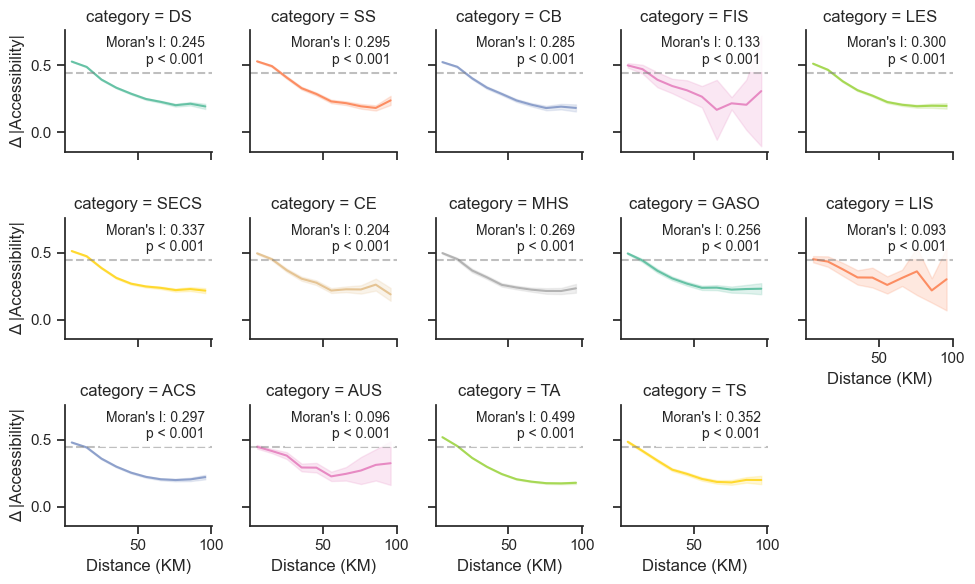

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import libpysal.weights as weights
import esda
sns.set_theme(style="ticks")

df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')

# 定义类别顺序（请替换为你想要的顺序）
category_order = ['DS', 'SS', 'CB', 'FIS', 'LES',
                  'SECS', 'CE', 'MHS', 'GASO', 'LIS',
                  'ACS', 'AUS', 'TA', 'TS']  # 替换为你的实际类别名称

def global_morans_i(df, column, k=5):
    coords = df[['lng', 'lat']].values
    knn = weights.KNN.from_array(coords, k=k)
    moran = esda.moran.Moran(df[column], knn)
    return moran

# 创建距离的bins
n_bins = 10
bins = np.linspace(0, 101, n_bins+1)
bin_centers = (bins[:-1] + bins[1:]) / 2

# 将distance分组并计算bin的中心值
df['distance_bin'] = pd.cut(df['distance'], bins=bins, labels=bin_centers)
df['distance_bin'] = df['distance_bin'].astype(float)

# 计算整体的平均abs_difference
overall_mean = df['abs_difference'].mean()

# 确保category列按照指定顺序排序
df['category'] = pd.Categorical(df['category'], categories=category_order, ordered=True)

# 计算每个category在每个distance bin的平均abs_difference和标准误差
grouped_data = df.groupby(['category', 'distance_bin']).agg({
    'abs_difference': ['mean', 'std', 'count']
}).reset_index()

# 重命名列
grouped_data.columns = ['category', 'distance_bin', 'mean', 'std', 'count']

# 计算95%置信区间
grouped_data['ci'] = 1.96 * grouped_data['std'] / np.sqrt(grouped_data['count'])
grouped_data['ci_lower'] = grouped_data['mean'] - grouped_data['ci']
grouped_data['ci_upper'] = grouped_data['mean'] + grouped_data['ci']

# 计算每个类别的莫兰指数
moran_i_values = {}
for category in category_order:
    df_cat = df[df['category'] == category]
    moran = global_morans_i(df_cat, 'abs_difference', k=5)
    moran_i_values[category] = {'I': moran.I, 'p_value': moran.p_sim}

# 确保grouped_data中的category也是有序的
grouped_data['category'] = pd.Categorical(grouped_data['category'], 
                                        categories=category_order, 
                                        ordered=True)

# 使用Set2调色板创建FacetGrid
g = sns.FacetGrid(grouped_data, 
                  col='category',
                  col_wrap=5, 
                  height=2,
                  col_order=category_order)

# 获取Set2颜色
colors = sns.color_palette('Set2', n_colors=len(category_order))
color_dict = dict(zip(category_order, colors))

# 绘制曲线和置信区间
for ax, (name, data) in zip(g.axes, grouped_data.groupby('category')):
    color = color_dict[name]
    ax.plot(data['distance_bin'], data['mean'], color=color)
    ax.fill_between(data['distance_bin'], 
                   data['ci_lower'], 
                   data['ci_upper'], 
                   alpha=0.2,
                   color=color)
    
    ax.axhline(y=overall_mean, color='gray', linestyle='--', alpha=0.5)
    
    # 添加莫兰指数
    moran_i = moran_i_values[name]['I']
    p_value = moran_i_values[name]['p_value']
    ax.text(0.95, 0.95, 
            f'Moran\'s I: {moran_i:.3f}\np < {p_value:.3f}',
            transform=ax.transAxes, 
            fontsize=10,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    ax.set_xlabel('Distance (KM)')
    ax.set_ylabel('Δ |Accessibility|')
    ax.set_title(f'category = {name}')

plt.tight_layout()
plt.show()

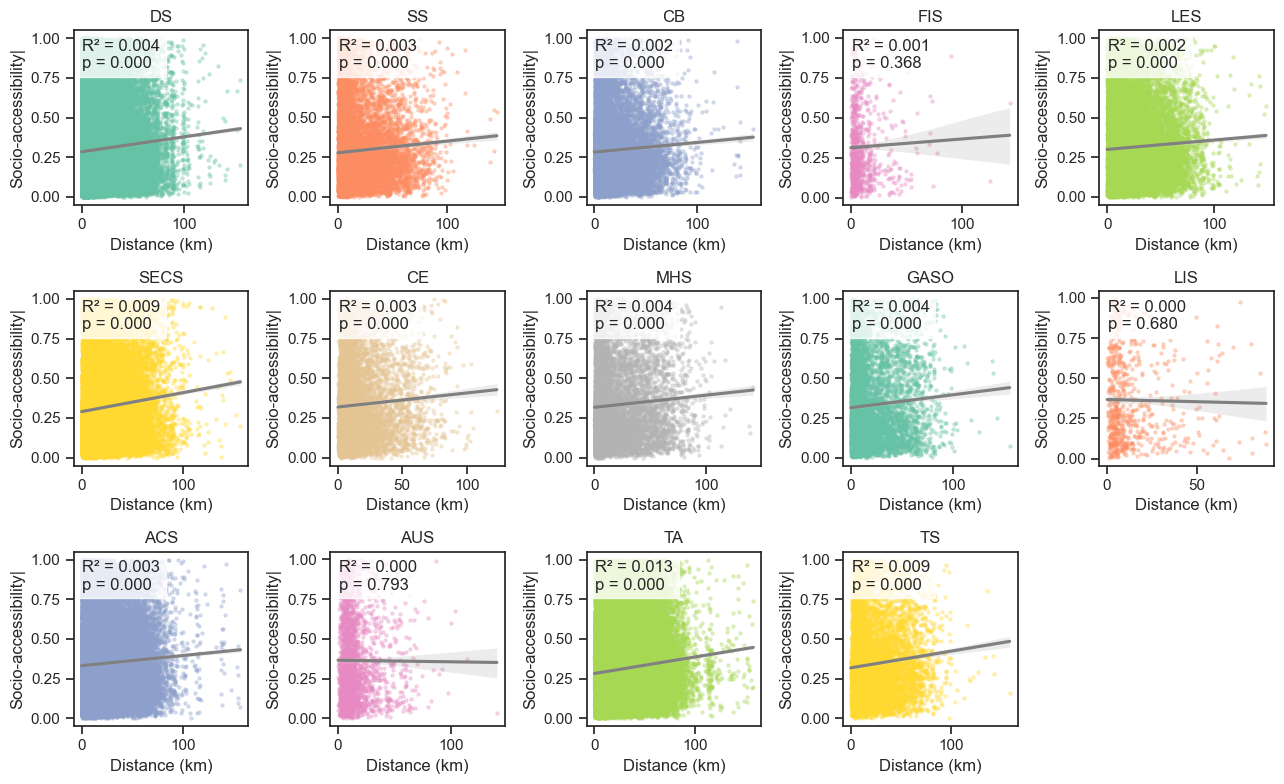

In [37]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import libpysal.weights as weights
import esda
sns.set_theme(style="ticks")


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm

df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')
df = df.dropna()

q_low = df[x].quantile(0.05)
q_hi = df[x].quantile(0.95)
df_clean = df[(df[x] > q_low) & (df[x] < q_hi)]

# 定义类别顺序（请替换为你想要的顺序）
category_order = ['DS', 'SS', 'CB', 'FIS', 'LES',
                  'SECS', 'CE', 'MHS', 'GASO', 'LIS',
                  'ACS', 'AUS', 'TA', 'TS']  # 替换为你的实际类别名称
# 设置颜色
fig, axes = plt.subplots(3, 5, figsize=(13, 8))
axes = axes.ravel()

# 设置颜色
colors = sns.color_palette('Set2', n_colors=len(category_order))
color_dict = dict(zip(category_order, colors))

# 对每个类别进行循环
for idx, category in enumerate(category_order):
    ax = axes[idx]
    category_data = df_clean[df_clean['category'] == category]
    
    # 使用regplot绘制回归图
    sns.regplot(data=category_data, 
                x='distance', 
                # y='abs_difference',
                y='segregation_abs_normalized',
                scatter_kws={'alpha':0.3, 's':5},
                line_kws={'color': 'gray'},
                color=color_dict[category],
                ax=ax)
    
    # 计算R²和p值
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        category_data['distance'], 
        # category_data['abs_difference']
        category_data['segregation_abs_normalized']
    )
    
    # 添加R²和p值文本
    ax.text(0.05, 0.95, f'R² = {r_value**2:.3f}\np = {p_value:.3f}', 
            transform=ax.transAxes, 
            verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.8))
    
    # 设置标题和标签
    ax.set_title(category)
    ax.set_xlabel('Distance (km)')
    # ax.set_ylabel('Δ |Accessibility|')
    ax.set_ylabel('Socio-accessibility|')

# 删除多余的子图
for idx in range(len(category_order), 15):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [103]:
grouped_data

,category,distance_bin,mean,std,count,ci,ci_lower,ci_upper
0,DS,5.05,0.528133,0.204938,90728,0.001334,0.526799,0.529466
1,DS,15.15,0.488437,0.200302,13944,0.003325,0.485112,0.491761
2,DS,25.25,0.394207,0.187586,5441,0.004984,0.389222,0.399191
3,DS,35.35,0.333511,0.163662,3809,0.005198,0.328314,0.338709
4,DS,45.45,0.288735,0.153611,2549,0.005963,0.282772,0.294698
...,...,...,...,...,...,...,...,...
135,TS,55.55,0.207936,0.135934,441,0.012687,0.195249,0.220624
136,TS,65.65,0.185898,0.120154,329,0.012984,0.172914,0.198881
137,TS,75.75,0.182104,0.147101,267,0.017645,0.164459,0.199749
138,TS,85.85,0.200945,0.151769,205,0.020776,0.180169,0.221721


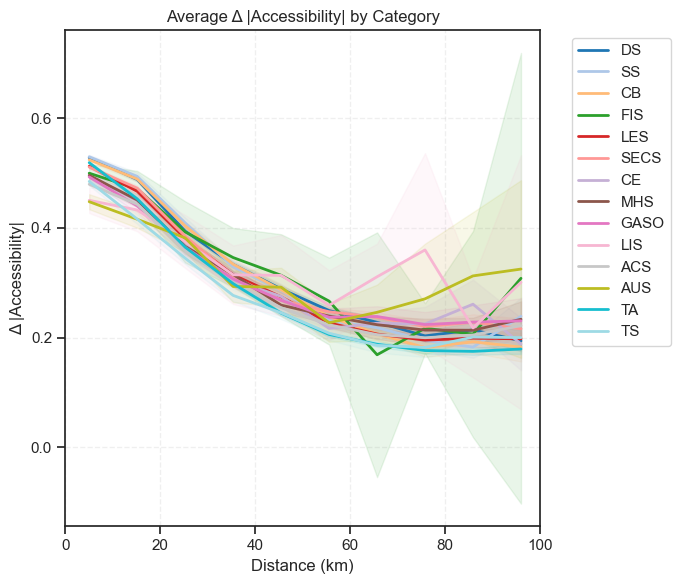

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))

category = grouped_data['category'].unique()
# 设置颜色循环
colors = plt.cm.tab20(np.linspace(0, 1, len(category)))

# 为每个类别计算和绘制
for idx, category in enumerate(category):
    category_df = grouped_data[grouped_data['category'] == category]
    
    # # 计算每个距离点的平均值和95% CI
    # distance_stats = []
    # for dist in category_df['distance'].unique():
    #     dist_data = category_df[category_df['distance'] == dist]['mean_value']
    #     mean = dist_data.mean()
    #     ci = 1.96 * dist_data.std() / np.sqrt(len(dist_data))  # 95% CI
    #     distance_stats.append({
    #         'distance': dist,
    #         'mean': mean,
    #         'ci_lower': mean - ci,
    #         'ci_upper': mean + ci
    #     })
    
    # stats_df = pd.DataFrame(distance_stats)
    
    # 绘制平均线和置信区间
    plt.plot(category_df['distance_bin'], category_df['mean'], 
            color=colors[idx], linewidth=2, label=category)
    plt.fill_between(category_df['distance_bin'], 
                    category_df['ci_lower'],
                    category_df['ci_upper'],
                    alpha=0.1, color=colors[idx])

plt.xlabel('Distance (km)')
plt.ylabel('Δ |Accessibility|')
plt.title('Average Δ |Accessibility| by Category')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 100)

plt.tight_layout()
plt.show()

C:\Users\浩然\AppData\Local\Temp\ipykernel_276\248588101.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(


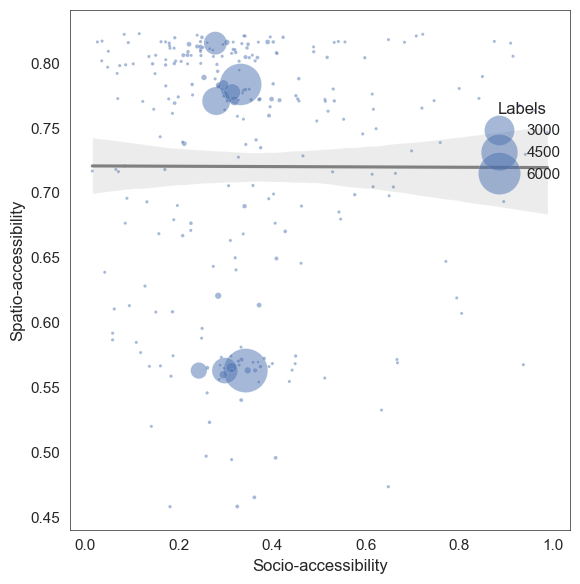

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')
# filtered_result = df_a[df_a['count'] >= 200]
dfdf = df[df['category'] == 'TS']
filtered_result = dfdf[dfdf['市'] == '上海市']
# filtered_result = filtered_result[filtered_result['count'] >= 200]

# category_medians = filtered_result.groupby('category')['abs_difference'].median().sort_values(ascending=False)
# # xx = filtered_result.groupby('category')['segregation_abs_normalized'].mean().sort_values(ascending=False)
# # yy = filtered_result.groupby('category')['accessibility'].mean().sort_values(ascending=False)
# # cc = filtered_result.groupby('category')count.sum().sort_values(ascending=False)
# filtered_result['category'] = pd.Categorical(filtered_result['category'], categories=category_medians.index, ordered=True)

palette = sns.color_palette("Set2")
sns.set_theme(style="white")

# 绘制散点图
plt.figure(figsize=(6, 6))
sns.despine(bottom=True, left=True)

x = 'segregation_abs_normalized'
y = 'accessibility'

scatter = sns.scatterplot(
    data=filtered_result,
    x=x,
    y=y,
    size='count',
    # hue='category',
    palette=palette,
    sizes=(5, 1000),
    alpha=0.5,
    # legend='full'
)

# Add regression line using sns.regplot
sns.regplot(data=filtered_result, x=x, y=y, scatter=False, color='gray', order=1, line_kws={'linestyle': '-'})

# 添加标题和标签
# plt.title('Scatter Plot of Experience Segregation Mean vs Variance (Count >= 500)')
plt.xlabel('Socio-accessibility', fontsize=12)
plt.ylabel('Spatio-accessibility', fontsize=12)

# 调整图例位置
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles[1:], labels=labels[1:], title='Labels', bbox_to_anchor=(0.8, 0.85), loc='upper left', frameon=False)

for spine in scatter.spines.values():
    spine.set_linewidth(0.5)
scatter.tick_params(width=0.5, length=3)

# 显示图表
plt.tight_layout()
# plt.savefig(r"D:\研究生\03Phd\segregation\shanghai\fig17.jpg", dpi=600, bbox_inches='tight')
plt.show()

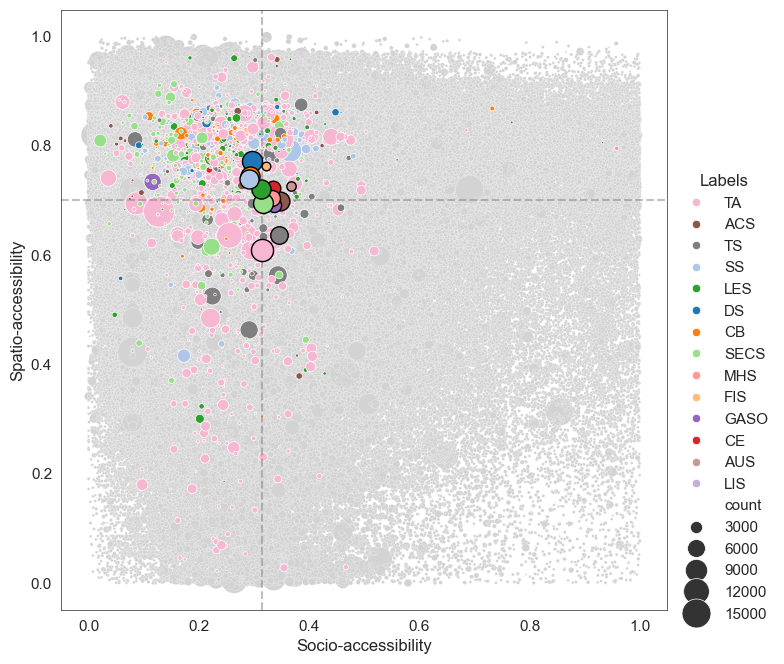

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')
df2 = df[df['category'] != 'AI']
filtered_result = df[df['count'] >= 0]
filtered_result = filtered_result[filtered_result['category'] != 'AI']

category_medians = df.groupby('category')['abs_difference'].median().sort_values(ascending=False)
xx = df2.groupby('category')['segregation_abs_normalized'].mean().sort_values(ascending=False)
yy = df2.groupby('category')['accessibility'].mean().sort_values(ascending=False)
cc = df.groupby('category')['count'].sum().sort_values(ascending=False)
filtered_result['category'] = pd.Categorical(filtered_result['category'], categories=category_medians.index, ordered=True)

# 创建颜色映射字典
palette = sns.color_palette("tab20")
color_dict = {cat: color for cat, color in zip(category_medians.index, palette)}

sns.set_theme(style="white")

# 绘制散点图
plt.figure(figsize=(8, 7))
sns.despine(bottom=True, left=True)

x = 'segregation_abs_normalized'
y = 'accessibility'

def scale_size(count):
    return (np.log10(count) - np.log10(cc.min())) * 100

# 创建颜色遮罩
filtered_result['color'] = 'gray'
filtered_result.loc[filtered_result['count'] >= 500, 'color'] = filtered_result.loc[filtered_result['count'] >= 500, 'category']

# 先画灰色点
gray_data = filtered_result[filtered_result['color'] == 'gray']
sns.scatterplot(
    data=gray_data,
    x=x,
    y=y,
    size='count',
    color='lightgray',
    sizes=(2, 500),
    # linewidth=0,
    alpha=1,
    legend=False
)

# 再画彩色点
colored_data = filtered_result[filtered_result['color'] != 'gray']
scatter = sns.scatterplot(
    data=colored_data,
    x=x,
    y=y,
    size='count',
    hue='color',
    palette={cat: color for cat, color in zip(category_medians.index, palette)},
    sizes=(2, 500),
    linewidth=0.5,
    alpha=1,
)

# Add regression line
# sns.regplot(data=df, x=x, y=y, scatter=False, color='gray', order=1, line_kws={'linestyle': '-'})

# 添加类别平均值点
for cat in xx.index:
    plt.scatter(
        xx[cat], 
        yy[cat], 
        s=scale_size(cc[cat]),  # 调整点的大小
        # c=[palette[list(xx.index).index(cat)]],  # 使用与散点图相同的颜色
        # marker='*',  # 使用星形标记
        # cmap={cat: color for cat, color in zip(category_medians.index, palette)},
        c=[color_dict[cat]],
        edgecolor='black',
        linewidth=1,
        alpha=1,
        zorder=5  # 确保在其他点的上面
    )

plt.xlabel('Socio-accessibility', fontsize=12)
plt.ylabel('Spatio-accessibility', fontsize=12)

# 调整图例
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles[1:], labels=labels[1:], title='Labels', bbox_to_anchor=(1, 0.75), frameon=False)

for spine in scatter.spines.values():
    spine.set_linewidth(0.5)
scatter.tick_params(width=0.5, length=3)

plt.xlabel('Socio-accessibility', fontsize=12)
plt.ylabel('Spatio-accessibility', fontsize=12)

plt.axhline(df['accessibility'].mean(), color='gray', linestyle='--', alpha=0.5)
plt.axvline(df['segregation_abs_normalized'].mean(), color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

C:\Users\浩然\AppData\Local\Temp\ipykernel_13364\2321500541.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.pointplot(
C:\Users\浩然\AppData\Local\Temp\ipykernel_13364\2321500541.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  g.legend(frameon=False)


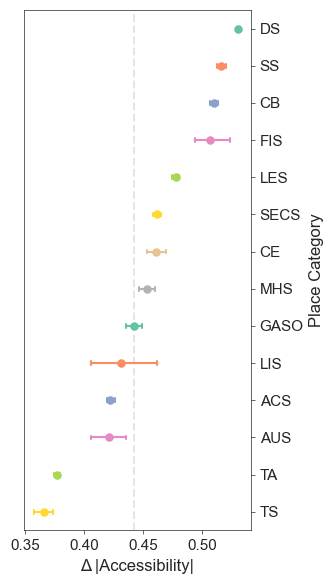

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from inequalipy import *
import pandas as pd
import numpy as np

# Load the segregation data
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')

# df = df[df['市'] == '深圳市']


# Calculate medians and sort categories
category_medians = df.groupby('category')['abs_difference'].median().sort_values(ascending=False)
df['category'] = pd.Categorical(df['category'], categories=category_medians.index, ordered=True)

# 首先计算每个category的基尼指数
# gini_by_category = df.groupby('category')['segregation_abs_normalized'].apply(lambda x: gini(x.values))

# 将结果转换为DataFrame并重命名列
# gini_df = gini_by_category.reset_index()
# gini_df.columns = ['category', 'gini']

# 将gini值合并到原始DataFrame中
# df = df.merge(gini_df, on='category', how='left')

# Set up the plot
sns.set_theme(style="ticks")
fig, ax1 = plt.subplots(figsize=(3.5, 6))
# ax2 = ax1.twiny()

# # Plot Gini index
# g2 = sns.barplot(
#     data=df,
#     x="gini",
#     y="category",
#     ax=ax2,
#     palette="Set2",
#     alpha=0.2,
#     zorder=3,

# )

# Plot segregation index
g = sns.pointplot(
    data=df, 
    x="abs_difference", 
    y="category", 
    ax=ax1,
    dodge=0,  
    palette="Set2", 
    errorbar='ci',
    markers="o", 
    markersize=5, 
    linestyle="none", 
    estimator='median',
    capsize=0.1,
    linewidth=1.5,
    zorder=3
)


# sns.despine(right=True)
for spine in g.spines.values():
    spine.set_linewidth(0.5)
g.tick_params(width=0.5, length=3)
g.legend(frameon=False)

# # sns.despine(right=True)
# for spine in g2.spines.values():
#     spine.set_linewidth(0.5)
# g2.tick_params(width=0.5, length=3)
# g2.legend(frameon=False)

# Adjust labels and titles
ax1.set_xlabel('Δ |Accessibility|', fontsize=12)
ax1.set_ylabel('Place Category', fontsize=12)
# ax2.set_xlabel('Gini Index (Bar Plot)', fontsize=12)

# ax1.set_xlim(0.7, 0.8)
# ax2.set_xlim(0, 1)
g.axvline(df['abs_difference'].mean(), color='gray', linestyle='--', alpha=0.2)
# Remove horizontal grid lines
ax1.grid(axis='y', visible=False)
# ax2.grid(visible=False)

# Move y-axis ticks and labels to the right
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")

# Adjust the layout
plt.tight_layout()

# Save and show the plot
# plt.savefig(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\figure\place_seg_gini_overlapped.svg', bbox_inches='tight')
plt.show()

In [2]:
category_medians

category
DS      0.530799
SS      0.515938
CB      0.509772
FIS     0.506809
LES     0.477990
SECS    0.462172
CE      0.461013
MHS     0.453110
GASO    0.442306
LIS     0.431268
ACS     0.422247
AUS     0.421330
TA      0.377223
TS      0.366520
Name: abs_difference, dtype: float64

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the segregation data
df_long = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')
df_long.head(2)

,node,geohash,place,lat,lng,segregation,place_category,segregation_abs,省,省代码,市,市代码,count,segregation_abs_normalized,category,accessibility,difference,abs_difference,distance
0,loc_1927·鲁迅与内山纪念书局,wtw3u7f,1927·鲁迅与内山纪念书局,31.266743,121.479122,0.853908,"science, education, and cultural services",0.853908,上海市,310000.0,上海市,310000.0,0,0.146095,SECS,0.805084,0.658989,0.658989,2.125515
1,loc_三门峡,wqpjf7m,三门峡,34.779318,111.200545,0.963880,tourist attractions,0.963880,河南省,410000.0,三门峡市,411200.0,5014,0.036121,TA,0.740694,0.704574,0.704574,1.816411


In [9]:
df = df_long[df_long['category']=='TA']
df['segregation_abs_normalized'].median()

0.272163053

In [ ]:
len(df_long)

412501

C:\Users\浩然\AppData\Local\Temp\ipykernel_7492\4147714114.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g2 = sns.barplot(
C:\Users\浩然\AppData\Local\Temp\ipykernel_7492\4147714114.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.pointplot(
C:\Users\浩然\AppData\Local\Temp\ipykernel_7492\4147714114.py:128: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
C:\Users\浩然\AppData\Local\Temp\ipykernel_7492\4147714114.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


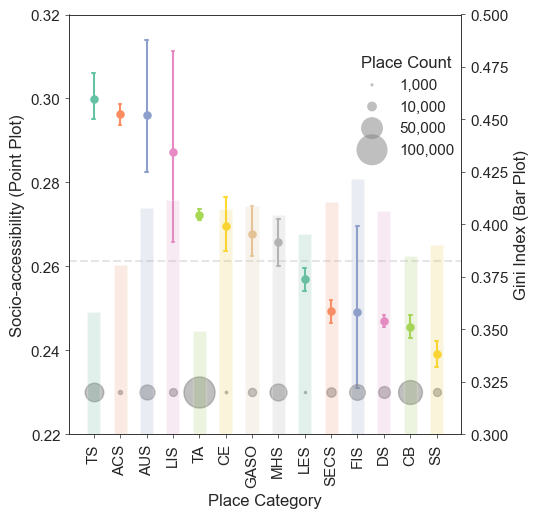

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the segregation data
df_long = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')

# Load the Gini data
gini_data = pd.DataFrame({
    'place_category': [
        'financial and insurance services', 'shopping services',
        'science, education, and cultural services', 'commercial buildings',
        'dining services', 'leisure services', 'real estate communities',
        'medical and health services',
        'government agencies and social organizations', 'companies and enterprises',
        'life services', 'tourist attractions', 'automotive services',
        'accommodation services', 'transportation services'
    ],
    'gini': [
        0.42149651, 0.390313579, 0.410516809, 0.384882044, 0.406408947,
        0.395276931, 0.413926537, 0.404490163, 0.408754182,
        0.407415661, 0.411795174, 0.349294519, 0.4076102, 0.380729979, 0.35817358
    ]
})

# Count data
count_data = pd.DataFrame({
    'place_category': [
        'financial and insurance services', 'shopping services',
        'science, education, and cultural services', 'commercial buildings',
        'dining services', 'leisure services', 'real estate communities',
        'medical and health services',
        'government agencies and social organizations', 'companies and enterprises',
        'life services', 'tourist attractions', 'automotive services',
        'accommodation services', 'transportation services'
    ],
    'countss': [
        706, 15978, 27900, 25473, 110024, 32594, 31096, 9969,
        7657, 6962, 522, 65047, 1901, 39278, 7146
    ]
})

# Merge the segregation, Gini, and count data
df_merged = pd.merge(df_long, gini_data, on='place_category')
df_merged = pd.merge(df_merged, count_data, on='place_category')

# Calculate medians and sort categories
category_medians = df_merged.groupby('category')['segregation_abs_normalized'].median().sort_values(ascending=False)
df_merged['category'] = pd.Categorical(df_merged['category'], categories=category_medians.index, ordered=True)

# Set up the plot
sns.set_theme(style="ticks")
fig, ax1 = plt.subplots(figsize=(6, 5))
ax2 = ax1.twinx()

# Plot Gini index
g2 = sns.barplot(
    data=df_merged,
    y="gini",
    x="category",
    ax=ax2,
    palette="Set2",
    alpha=0.2,
    zorder=2,
    width=.5
)

# Plot segregation index
g = sns.pointplot(
    data=df_merged, 
    y="segregation_abs_normalized", 
    x="category", 
    ax=ax1,
    dodge=0,  
    palette="Set2", 
    errorbar='ci',
    markers="o", 
    markersize=5, 
    linestyle="none", 
    estimator='median',
    capsize=0.1,
    linewidth=1.5,
    zorder=3
)

# Add circles for count below each column
count_normalized = (df_merged.groupby('place_category')['countss'].first() / df_merged['countss'].max()) * 500
for i, (category, count) in enumerate(count_normalized.items()):
    ax1.scatter(i, 0.23, s=count, color='gray', alpha=0.5, zorder=4)

# Customize spines and ticks
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
    ax.tick_params(width=0.5, length=3)

# Rotate x-axis labels
# plt.xticks(rotation=90)  # 修改此行，将x轴标签旋转90度
ax1.axhline(df_merged['segregation_abs_normalized'].median(), color='gray', linestyle='--', alpha=0.2)

# Adjust labels and titles
ax1.set_ylabel('Socio-accessibility (Point Plot)', fontsize=12)
ax1.set_xlabel('Place Category', fontsize=12)
ax2.set_ylabel('Gini Index (Bar Plot)', fontsize=12)

ax1.set_ylim(0.22, 0.32)
ax2.set_ylim(0.3, 0.5)

# Remove vertical grid lines
ax1.grid(axis='x', visible=False)
ax2.grid(visible=False)

# Add legend for circle sizes
sizes = [1000, 10000, 50000, 100000]
labels = ['1,000', '10,000', '50,000', '100,000']
legend_elements = [plt.scatter([], [], s=size/200, c='gray', edgecolor='none',alpha=0.5, label=label) for size, label in zip(sizes, labels)]

# Create new axis for legend
legend_ax = fig.add_axes([0.61, 0.65, 0.2, 0.2])  # [left, bottom, width, height]
legend_ax.axis('off')
legend = legend_ax.legend(handles=legend_elements, title='Place Count', loc='center left', frameon=False)

# Adjust main plot position
ax1.set_position([0.1, 0.2, 0.85, 0.7])  # [left, bottom, width, height]
ax2.set_position([0.1, 0.2, 0.85, 0.7])

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Adjust the layout
plt.tight_layout()

# plt.savefig(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\figure\place_seg_gini_overlapped.svg', bbox_inches='tight')

# Show the plot
plt.show()

In [41]:
category_medians

category
TS      0.299841
ACS     0.296249
AUS     0.296028
LIS     0.287211
TA      0.272163
CE      0.269604
GASO    0.267812
MHS     0.265792
LES     0.256997
SECS    0.249373
FIS     0.249206
DS      0.247058
CB      0.245564
SS      0.239230
Name: segregation_abs_normalized, dtype: float64

In [24]:
# Calculate medians and sort categories
category_medians = df_merged.groupby('place_category')['y_new'].median().sort_values(ascending=False)
category_medians

C:\Users\浩然\AppData\Local\Temp\ipykernel_11508\4268495731.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_medians = df_merged.groupby('place_category')['y_new'].median().sort_values(ascending=False)


place_category
transportation services                         0.292251
accommodation services                          0.285961
automotive services                             0.278951
tourist attractions                             0.267158
life services                                   0.262868
companies and enterprises                       0.258740
government agencies and social organizations    0.255853
address information                             0.255846
medical and health services                     0.251169
real estate communities                         0.250614
leisure services                                0.250196
dining services                                 0.243344
commercial buildings                            0.243197
science, education, and cultural services       0.238138
shopping services                               0.233478
financial and insurance services                0.232738
Name: y_new, dtype: float64

C:\Users\浩然\AppData\Local\Temp\ipykernel_27932\3823591311.py:25: UserWarning: 
The palette list has fewer values (8) than needed (15) and will cycle, which may produce an uninterpretable plot.
  scatter = sns.scatterplot(
C:\Users\浩然\AppData\Local\Temp\ipykernel_27932\3823591311.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  scatter.legend(frameon=False)


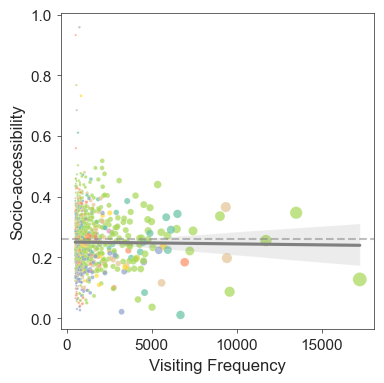

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\merged_result.csv', encoding='gbk')
filtered_result = df_merged[df_merged['count'] >= 500]

palette = sns.color_palette("Set2")
sns.set_theme(style="ticks")

# Calculate medians and sort categories
# category_medians = df.groupby('category')['segregation_abs_normalized'].median().sort_values(ascending=False)
# filtered_result['category'] = pd.Categorical(filtered_result['category'], categories=category_medians.index, ordered=True)

# 绘制散点图
plt.figure(figsize=(4, 4))
sns.despine(bottom=True, left=True)

# category_order = ['Automotive Services', 'Tourist Attractions',  'Financial and Insurance Services', 'Shopping Services','Science, Education, and Cultural Services',
#                   'Address Information',  'Leisure Services',  'Transportation Services',
#                 'Commercial Buildings', 'Government Agencies and Social Organizations', 'Accommodation Services', 'Life Services', 'Dining Services', 'Medical and Health Services', 
#                    'Companies and Enterprises', 'Real Estate Communities']
# df['category'] = pd.Categorical(df['category'], categories=category_order, ordered=True)

scatter = sns.scatterplot(
    data=filtered_result,
    y='segregation_abs_normalized',
    x='count',
    size='count',
    hue='category',
    palette=palette,
    sizes=(2, 100),
    alpha=0.7,
    legend=None
    
)

sns.regplot(data=filtered_result, y='segregation_abs_normalized', x='count', scatter=False, color='gray', line_kws={'linestyle': '-'})

# sns.despine(right=True)
for spine in scatter.spines.values():
    spine.set_linewidth(0.5)
scatter.tick_params(width=0.5, length=3)
scatter.legend(frameon=False)

# scatter.set(xscale="log", yscale="log")

# plt.axvline(df[x].mean(), color='gray', linestyle='--', alpha=0.5)
plt.axhline(df['segregation_abs_normalized'].median(), color='gray', linestyle='--', alpha=0.5)

# 添加标题和标签
# plt.title('Scatter Plot of Experience Segregation Mean vs Variance (Count >= 500)')
plt.ylabel('Socio-accessibility', fontsize=12)
plt.xlabel('Visiting Frequency', fontsize=12)

# 调整图例位置
# handles, labels = scatter.get_legend_handles_labels()
# scatter.legend(handles=handles[1:], labels=labels[1:], title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# 显示图表
plt.tight_layout()
# plt.savefig(r"D:\研究生\03Phd\segregation\shanghai\fig17.jpg", dpi=600, bbox_inches='tight')
plt.show()

C:\Users\浩然\AppData\Local\Temp\ipykernel_27932\3606888825.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  scatter.legend(frameon=False)


Text(0, 0.5, '')

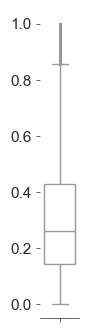

In [8]:
plt.figure(figsize=(0.5, 4))
scatter = sns.boxplot(y=df_merged['segregation_abs_normalized'], 
                    #   palette='Set2', 
                      color='white',
                      fliersize=0.1,)
sns.despine(left=True)
# sns.despine(right=True)
for spine in scatter.spines.values():
    spine.set_linewidth(0.5)
scatter.tick_params(width=0.5, length=3)
scatter.legend(frameon=False)
plt.ylabel('')

In [79]:
from scipy import stats
# Calculate correlation coefficient and p-value
correlation, p_value = stats.pearsonr(filtered_result['count'], filtered_result['segregation_abs_normalized'])
correlation, p_value

(-0.012998567316239471, 0.594333125951893)

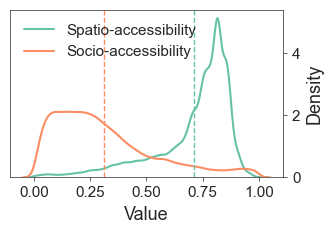

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager as font_manager
from adjustText import adjust_text

sns.set_theme(style="ticks")
palette = sns.color_palette('Set2')
plt.figure(figsize=(3.5, 2.5))

# Load the data
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')

# Plot both distributions
g = sns.kdeplot(data=df, 
                x='accessibility',
                label='Spatio-accessibility',
                fill=False,
                # alpha=.1,
                linewidth=1.5,
                color=palette[0])

g = sns.kdeplot(data=df,
                x='segregation_abs_normalized', 
                label='Socio-accessibility',
                fill=False,
                # alpha=.1,
                linewidth=1.5,
                color=palette[1])

plt.xlabel('Value', fontsize=13)
plt.ylabel('Density', fontsize=13)

# Add median lines
acc_median = df['accessibility'].mean()
seg_median = df['segregation_abs_normalized'].mean()
g.axvline(acc_median, color=palette[0], linestyle='--', linewidth=1)
g.axvline(seg_median, color=palette[1], linestyle='--', linewidth=1)

# Format plot
for spine in g.spines.values():
    spine.set_linewidth(0.5)
g.tick_params(width=0.5, length=3)
g.legend(frameon=False)

# Move y-axis ticks and labels to the right
g.yaxis.tick_right()
g.yaxis.set_label_position("right")

plt.tight_layout()

C:\Users\浩然\AppData\Local\Temp\ipykernel_13420\500184400.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  g.legend(frameon=False)


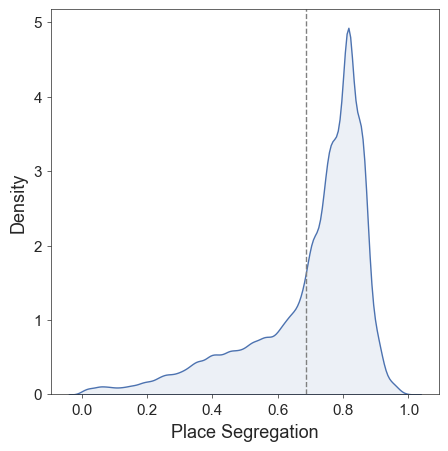

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager as font_manager
from adjustText import adjust_text

sns.set_theme(style="ticks")
palette = sns.color_palette('Set2')
plt.figure(figsize=(5, 5))

# Load the data
# df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\location_segregation_results_class2.csv', encoding='gbk')
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\final_result.csv')
# df_a['abs_difference'] = abs(df_a['accessibility'] - df_a['segregation_abs_normalized'])

g = sns.kdeplot(data=df, 
            x='accessibility', 
            # hue='social_status', 
            fill=True,
            # palette=palette,
            # color='#4C94C2',
            alpha=.1,
            legend=True,
            linewidth=1,
            )

plt.xlabel('Place Segregation', fontsize=13)
plt.ylabel('Density', fontsize=13)

place_median = df['segregation_abs'].mean()
g.axvline(place_median, color='gray', linestyle='--', linewidth=1)

# sns.despine(right=True)
for spine in g.spines.values():
    spine.set_linewidth(0.5)
g.tick_params(width=0.5, length=3)
g.legend(frameon=False)

# g.spines['top'].set_visible(False)
# g.spines['left'].set_visible(False)
# g.spines['right'].set_visible(False)
# plt.savefig(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\figure\desity.svg', dpi=600, bbox_inches='tight')

In [1]:
from openai import OpenAI
import pandas as pd
import time
import os
from tqdm import tqdm
import datetime
from ratelimit import limits, sleep_and_retry

# Set up the rate limiter
CALLS = 2000
RATE_LIMIT = 10

@sleep_and_retry
@limits(calls=CALLS, period=RATE_LIMIT)
def call_api(client, text):
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": 
                 '''You are a geography expert. Please categorize according to the adress name provided to you. Here are the categories for your reference. 'Tourist Attractions', 'Automotive Services', 'Financial and Insurance Services', 'Shopping Services','Science, Education, and Cultural Services', 'Address Information',  'Leisure Services', 'Transportation Services', 'Life Services', 'Accommodation Services', 'Government Agencies and Social Organizations', 'Commercial Buildings', 'Dining Services', 'Medical and Health Services', 'Companies and Enterprises', 'Real Estate Communities.\n You must return only one category!'Tourist Attractions', OR'Automotive Services', OR 'Financial and Insurance Services', OR 'Shopping Services', OR 'Science, Education, and Cultural Services', OR 'Address Information',  OR 'Leisure Services', OR 'Transportation Services', OR 'Life Services', OR 'Accommodation Services', OR 'Government Agencies and Social Organizations', OR 'Commercial Buildings', OR 'Dining Services', OR 'Medical and Health Services', OR 'Companies and Enterprises', OR 'Real Estate Communities.'''
                },
                {"role": "user", "content": text}
            ]
        )
        return response.choices[0].message.content.strip().lower()
    except Exception as e:
        print(f"Error occurred: {e}")
        return None

def analyze_sentiment(texts):
    client = OpenAI(
        api_key = "sk-7ncKHBPa4Anha3Utb2Lbc1aNRCzHcr2038SbdKL0jV81q6e0",
        base_url = "https://api.deepbricks.ai/v1/",
    )

    # client = OpenAI(
    #     api_key = "sk-8YQupiKumj8MoRYDEcFa2e7f25F74c89Bd52B2F27772Ea6e",
    #     base_url = "https://api.zetatechs.com/v1/",
    # )
    
    results = []
    for text in texts:
        result = call_api(client, text)
        if result:
            results.append(result)
        else:
            results.append(None)  # Append "错误" if there was an error
    
    return results

# 指定包含CSV文件的文件夹路径
filename = r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\place.csv'
output_filename = r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\placeclass'
df = pd.read_csv(filename, encoding='gbk')

df['place_category'] = None
last_save_time = time.time()

# 每次处理50行
for i in tqdm(range(0, len(df), 50), desc=f"Processing {filename}"):
    chunk = df.iloc[i:i+50]
    texts = chunk['place'].tolist()
    sentiments = analyze_sentiment(texts)
    
    for j, sentiment in enumerate(sentiments):
        if sentiment is not None:
            df.at[i+j, 'place_category'] = sentiment
    current_time = time.time()
    if current_time - last_save_time >= 1800:
        df_to_save = df.dropna(subset=['place_category'])
        timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
        # save_path =  os.path.join()
        df_to_save.to_csv(f"{output_filename}\{timestamp}.csv", index=False)
        last_save_time = current_time
# # 移除sentiment为None的行
# df = df.dropna(subset=['place_category'])

Processing D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\place.csv: 100%|██████████| 12/12 [08:33<00:00, 42.76s/it]


In [2]:
df.to_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\placeclass\xxx.csv', index=False)

## 计算基尼指数

In [1]:
import pandas as pd
from inequalipy import *

# 读取CSV文件
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\merged_result.csv', encoding='gbk')

In [2]:
from sklearn.preprocessing import MinMaxScaler

# 先进行 1-x 的转换
df['segregation_abs_inverted'] = 1 - df['segregation_abs']

# 创建 MinMaxScaler 对象
scaler = MinMaxScaler()

# 将转换后的列转换为二维数组格式
segregation_values = df['segregation_abs_inverted'].values.reshape(-1, 1)

# 进行归一化
segregation_normalized = scaler.fit_transform(segregation_values)

# 将归一化后的值添加到数据框中
df['segregation_abs_normalized'] = segregation_normalized

# 如果不需要中间的 inverted 列，可以删除
df.drop('segregation_abs_inverted', axis=1, inplace=True)
df.to_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\merged_result.csv', index=False)

In [3]:
df

,node,geohash,place,lat,lng,segregation,place_category,segregation_abs,省,省代码,市,市代码,count,segregation_abs_normalized
0,loc_1927·鲁迅与内山纪念书局,wtw3u7f,1927·鲁迅与内山纪念书局,31.266743,121.479122,0.853908,"science, education, and cultural services",0.853908,上海市,310000.0,上海市,310000.0,0,0.146095
1,loc_三门峡,wqpjf7m,三门峡,34.779318,111.200545,0.963880,tourist attractions,0.963880,河南省,410000.0,三门峡市,411200.0,5014,0.036121
2,loc_三明站,wset5xr,三明站,26.232488,117.585673,0.898601,address information,0.898601,福建省,350000.0,三明市,350400.0,72,0.101401
3,loc_亚龙湾热带天堂森林公园,w7jzzhm,亚龙湾热带天堂森林公园,18.260903,109.651758,0.939853,tourist attractions,0.939853,海南省,460000.0,三亚市,460200.0,1127,0.060148
4,loc_三亚凤凰岛,w7jzg9u,三亚凤凰岛,18.247167,109.496080,0.769548,tourist attractions,0.769548,海南省,460000.0,三亚市,460200.0,1000,0.230456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505000,loc_龙虎山上清宫,wsgpwnr,龙虎山上清宫,28.072442,116.992666,0.886609,tourist attractions,0.886609,江西省,360000.0,鹰潭市,360600.0,2,0.113393
505001,loc_天龙国际广场,wtc5dk6,天龙国际广场,32.982515,114.009068,-0.414530,commercial buildings,0.414530,河南省,410000.0,驻马店市,411700.0,2,0.585482
505002,loc_导氮教育(置地校区),wtc5f80,导氮教育(置地校区),33.003456,114.017305,-0.363768,"science, education, and cultural services",0.363768,河南省,410000.0,驻马店市,411700.0,5,0.636245
505003,loc_周塘特色小镇火车文化园,wt51p6d,周塘特色小镇火车文化园,28.315089,117.040421,-0.121658,leisure services,0.121658,江西省,360000.0,鹰潭市,360600.0,2,0.878359


In [ ]:
import pandas as pd
from inequalipy import *

# 读取CSV文件
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\merged_result.csv', encoding='gbk')

# 计算平均EDI，分组依据是city
average = df.groupby('市')['segregation_abs_normalized'].median().reset_index()
average.columns = ['市', 'acc_median']

# 计算基尼系数
gini_indices = df.groupby('市')['segregation_abs_normalized'].apply(lambda x: gini(x.values)).reset_index()
gini_indices.columns = ['市', 'gini']

# 计算每个市的数据点数量
count = df.groupby('市').size().reset_index(name='count')

# 合并平均EDI、基尼系数和数据点数量
result = pd.merge(average, gini_indices, on='市')
result = pd.merge(result, count, on='市')

# 保存结果
result.to_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\gini_index_city.csv', index=False)


基本统计量：
count    505078.000000
mean          0.315500
std           0.227723
min           0.000000
25%           0.141879
50%           0.261840
75%           0.427874
max           1.000000
Name: segregation_abs_normalized, dtype: float64

偏度: 1.027
峰度: 0.471

正态性检验 p值: 0.000

均值: 0.315
中位数: 0.262
差异（均值-中位数）: 0.054


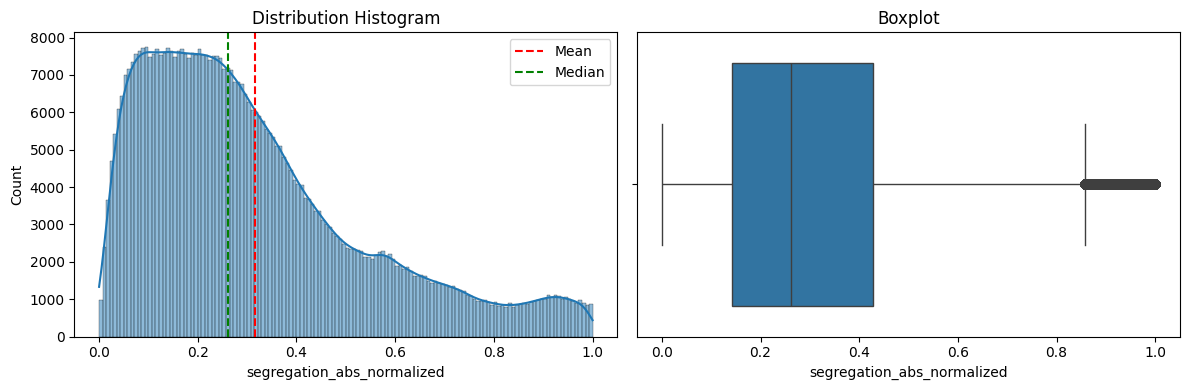

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你的数据列名为 'segregation_abs'
# 计算基本统计量
basic_stats = df['segregation_abs_normalized'].describe()
print("\n基本统计量：")
print(basic_stats)

# 计算偏度和峰度
skewness = stats.skew(df['segregation_abs_normalized'])
kurtosis = stats.kurtosis(df['segregation_abs_normalized'])
print(f"\n偏度: {skewness:.3f}")
print(f"峰度: {kurtosis:.3f}")

# 正态性检验
statistic, p_value = stats.normaltest(df['segregation_abs_normalized'])
print(f"\n正态性检验 p值: {p_value:.3f}")

# 计算均值和中位数的差异
mean_val = df['segregation_abs_normalized'].mean()
median_val = df['segregation_abs_normalized'].median()
print(f"\n均值: {mean_val:.3f}")
print(f"中位数: {median_val:.3f}")
print(f"差异（均值-中位数）: {mean_val - median_val:.3f}")

# 可视化分布
plt.figure(figsize=(12, 4))

# 直方图
plt.subplot(121)
sns.histplot(df['segregation_abs_normalized'], kde=True)
plt.axvline(mean_val, color='r', linestyle='--', label='Mean')
plt.axvline(median_val, color='g', linestyle='--', label='Median')
plt.title('Distribution Histogram')
plt.legend()

# 箱线图
plt.subplot(122)
sns.boxplot(x=df['segregation_abs_normalized'])
plt.title('Boxplot')

plt.tight_layout()
plt.show()

C:\Users\浩然\AppData\Local\Temp\ipykernel_23116\4074312656.py:31: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  scatter = sns.scatterplot(


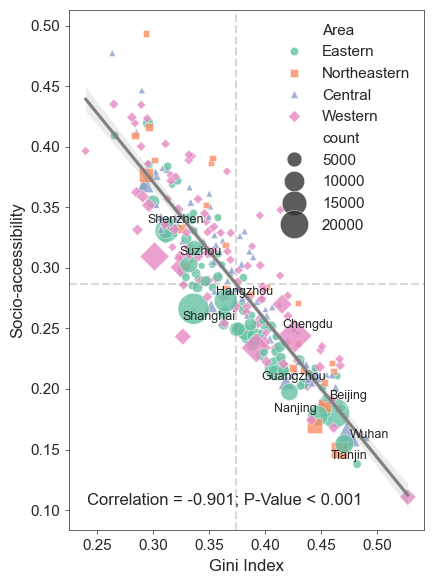

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager as font_manager
from adjustText import adjust_text
from scipy import stats

# Load the data
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\socio_acc_gini_by_city.csv', encoding='gbk')

# Set up the plot
plt.figure(figsize=(4.5, 6))
sns.set_theme(style="ticks")

x = 'gini'
y = 'socio-accessibility'

# Calculate correlation coefficient and p-value
correlation, p_value = stats.pearsonr(df[x], df[y])

# marker_order = ["o", "s", "^", "D"]

# 定义区域顺序
area_order = ["Eastern", "Northeastern", "Central", "Western"]

# 确保DataFrame中的Area列按照指定顺序排序
df['Area'] = pd.Categorical(df['Area'], categories=area_order, ordered=True)

# Create the scatter plot
scatter = sns.scatterplot(
    data=df,
    x=x,
    y=y,
    size='count',
    hue='Area',
    style='Area',
    markers={"Eastern": "o", "Northeastern": "s", "Central": "^", "Western": "D"},
    palette=sns.color_palette("Set2"),
    sizes=(20, 500),
    alpha=0.8,
    hue_order=area_order,
    style_order=area_order
)

# Add mean lines
plt.axvline(df[x].mean(), color='gray', linestyle='--', alpha=0.3)
plt.axhline(df[y].mean(), color='gray', linestyle='--', alpha=0.3)

sns.regplot(data=df, x=x, y=y, scatter=False, color='gray', line_kws={'linestyle': '-'})

# # Select cities to label
# top5_gini = df.nlargest(5, x)['cities'].tolist()
# # bottom5_gini = df.nsmallest(5, y)['cities'].tolist()
# top5_resident = df.nlargest(5, y)['cities'].tolist()
# # bottom5_resident = df.nsmallest(5, x)['cities'].tolist()
# sample = df.nlargest(10, 'count')['cities'].tolist()
topcity = ['Beijing', 'Shanghai', 'Shenzhen', 'Guangzhou', 'Hangzhou', 
                  'Nanjing', 'Suzhou', 'Wuhan', 'Chengdu', 'Tianjin']
cities_to_label = set(topcity
                    #   bottom5_gini + top5_resident + bottom5_resident + sample
                      )

# Add labels for selected cities
texts = []
for i, row in df.iterrows():
    if row['cities'] in cities_to_label:
        text = plt.text(row[x], row[y], str(row['cities']), 
                        fontsize=9, ha='center', va='center', 
                        # bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=0.5)
                        )
        texts.append(text)

# Adjust text positions to avoid overlaps
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Customize labels and title
plt.xlabel('Gini Index', fontsize=12)
plt.ylabel('Socio-accessibility', fontsize=12)
# plt.title('City Distribution by Resident Mean and Gini Resident', fontsize=16)
plt.legend(loc='upper right')

# sns.despine(right=True)
for spine in scatter.spines.values():
    spine.set_linewidth(0.5)
scatter.tick_params(width=0.5, length=3)
scatter.legend(frameon=False)

# 在图上添加相关系数
plt.text(0.05, 0.05, f'Correlation = {correlation:.3f}; P-Value < 0.001', 
         transform=plt.gca().transAxes, fontsize=12)

# Adjust layout and save
plt.tight_layout()
plt.savefig(r"D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\figure\gini&segcorr.svg", bbox_inches='tight')
plt.show()

In [52]:
df

,city,cities,code,Area,socio-accessibility,gini,diversity,常住城镇人口（万人）,常住乡村人口（万人）,常住人口总数（万）,...,总收入,Theil index,Pop Density,人口规模,人口密度,城市经济密度,经济发展水平,金融发展程度,对外开放水平,城镇化水平
0,三亚,Sanya,460200,Eastern,0.264951,0.381127,1.992813,75.150000,30.460000,105.6100,...,3.943335e+06,0.046862,5.570556,3.919793,5.570556,0.021452,9.016270,3.230013,0.375790,0.4711
1,三明,Sanming,350400,Eastern,0.341434,0.357956,2.207325,157.976000,90.024000,248.0000,...,8.630803e+06,0.044033,4.758578,5.589718,4.758578,0.013968,9.412219,1.383415,0.018806,0.3761
2,三门峡,Sanmenxia,411200,Central,0.295986,0.369220,2.279389,118.265140,85.534860,203.8000,...,5.722066e+06,0.046112,5.349296,5.397710,5.349296,0.021395,9.228279,1.589299,0.015477,0.3177
3,上海,Shanghai,310000,Eastern,0.266204,0.336109,2.250642,2223.000000,266.000000,2489.0000,...,1.934863e+08,0.018325,7.657292,7.201745,7.657292,0.985777,10.751885,4.877768,0.077466,0.7552
4,上饶,Shangrao,361100,Central,0.240962,0.404314,2.217349,356.002500,287.665000,643.6675,...,2.028695e+07,0.084944,5.664487,6.488262,5.664487,0.011090,8.305978,2.073058,0.028097,0.3972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,黄冈,Huanggang,421100,Central,0.330165,0.381696,2.272397,280.163854,298.656146,578.8200,...,1.444922e+07,0.062751,6.029242,6.585758,6.029242,0.022196,8.583543,1.200227,0.010576,0.1804
261,黄山,Huangshan,341000,Central,0.411997,0.285040,1.962081,78.921000,54.279000,133.2000,...,4.407109e+06,0.054650,5.009301,4.989820,5.009301,0.011055,8.906529,2.019198,0.023704,0.2077
262,黄石,Huangshi,420200,Central,0.249770,0.406818,2.367585,164.383164,80.046836,244.4300,...,8.324167e+06,0.055892,6.316822,5.536586,6.316822,0.059708,9.299450,1.171344,0.046612,0.4317
263,齐齐哈尔,Qiqihar,230200,Northeastern,0.215046,0.434282,2.350245,279.135981,237.378319,516.5143,...,1.397396e+07,0.029900,4.847410,6.293567,4.847410,0.008245,8.756840,2.048790,0.004571,0.5050


In [6]:
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\socio_acc_china_corr2.csv', encoding='gbk')
df.head()

,市,city,cities,code,Area,socio-accessibility,gini,diversity,abs_different,Pop (million),...,人口规模,人口密度,经济发展水平,对外开放水平,城镇化水平,科学技术水平,人力资本水平,市场化水平,房价,GDP
0,上海市,上海,Shanghai,310000,Eastern,0.266204,0.336109,2.250642,0.515242,24.8900,...,7.201745,7.657292,10.751885,0.077466,0.7552,0.010288,0.035394,1.041519,53203.85714,432150000
1,深圳市,深圳,Shenzhen,440300,Eastern,0.330580,0.312024,2.266178,0.438696,17.7910,...,5.016816,6.650033,10.906781,0.103569,0.5829,0.004377,0.045624,1.196046,57313.00000,306650000
2,广州市,广州,Guangzhou,440100,Eastern,0.216728,0.410331,2.219081,0.541615,18.8106,...,6.586434,6.882950,10.786676,0.061086,0.4771,0.005628,0.120589,0.475692,34249.57143,282320000
3,重庆市,重庆,Chongqing,500000,Western,0.234002,0.392133,2.290969,0.397093,32.1200,...,8.048820,5.939776,8.996776,0.011442,0.4190,0.002537,0.037787,0.893444,11872.42857,278940000
4,苏州市,苏州,Suzhou,320500,Eastern,0.303408,0.331968,2.270471,0.380680,12.8478,...,6.381765,6.545694,10.772540,0.201052,0.4908,0.002166,0.025832,0.657533,21888.85714,227180000


<Figure size 500x500 with 0 Axes>

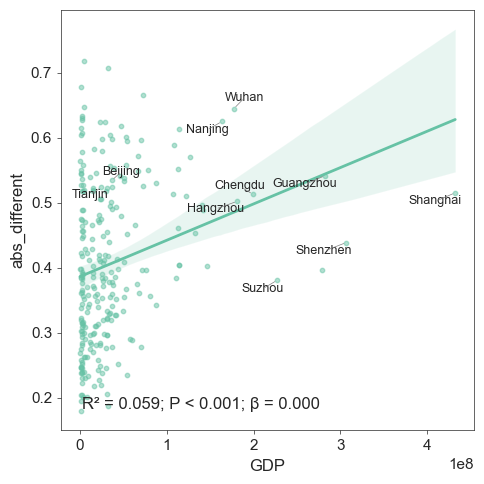

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression
from adjustText import adjust_text

sns.set_theme(style="ticks", palette='Set2')
plt.figure(figsize=(5, 5))

x_v = 'abs_different'
# x = '城镇化水平'
x = 'GDP'
# x = '社会消费品零售总额(万元)'

df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\socio_acc_china_corr2.csv', encoding='gbk')
df = df.dropna()

# 定义区域顺序和对应的标记样式
area_order = ["Eastern", "Northeastern", "Central", "Western"]
marker_dict = {"Eastern": "o", "Northeastern": "s", "Central": "^", "Western": "D"}
df['Area'] = pd.Categorical(df['Area'], categories=area_order, ordered=True)

# correlation, p_value = stats.pearsonr(df[x], df[x_v])
# Calculate p-value
# Calculate R² and p-value
X = df[x].values.reshape(-1, 1)
y_data = df[x_v].values
model = LinearRegression()
results = model.fit(X, y_data)
r2 = model.score(X, y_data)
coefficient = model.coef_[0]
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df[x_v])


# 创建基础图表
fig, ax = plt.subplots(figsize=(5, 5))

# 为每个区域绘制散点
# for area in area_order:
#     mask = df['Area'] == area
#     ax.scatter(df[x][mask], df[x_v][mask], 
#             #   marker=marker_dict[area], 
#               s=10, 
#               alpha=0.5,
#             #   label=area
#               )

ax.scatter(df[x], df[x_v], 
            #   marker=marker_dict[area], 
              s=10, 
              alpha=0.5,
            #   label=area
              )

# 添加回归线
sns.regplot(data=df, x=x, y=x_v, 
            scatter=False,
            # color='gray',
            # order=2,
            line_kws={'linestyle': '-', 'linewidth': 2},
            ax=ax)

# 设置边框
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)

# 修改刻度参数
ax.tick_params(width=0.5, length=3)

# 添加图例
# ax.legend(title='Area', loc='upper left', bbox_to_anchor=(0.62, 1), frameon=False)

# # 添加相关性文本
# ax.text(0.2, 0.05, f'Correlation = {correlation:.3f}; P-Value < {p_value:.2f}1', 
#         transform=ax.transAxes, fontsize=12)
# Add R² and p-value to the plot
if p_value < 0.001:
    p_value_text = "P < 0.001"
else:
    p_value_text = f"P = {p_value:.3f}"

plt.text(0.05, 0.05, f'R² = {r2:.3f}; {p_value_text}; β = {coefficient:.3f}', 
         transform=plt.gca().transAxes, fontsize=12)

# 添加城市标签
topcity = ['Beijing', 'Shanghai', 'Shenzhen', 'Guangzhou', 'Hangzhou', 
           'Nanjing', 'Suzhou', 'Wuhan', 'Chengdu', 'Tianjin']
cities_to_label = set(topcity)

texts = []
for i, row in df.iterrows():
    if row['cities'] in cities_to_label:
        text = ax.text(row[x], row[x_v], str(row['cities']), 
                      fontsize=9, ha='center', va='center')
        texts.append(text)

# 调整文本位置
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),
           expand_points=(5, 5), force_points=(1, 50))

# ax.set_ylabel('Δ |Accessibility|', fontsize=12)
ax.set_xlabel('Socio-accessibility', fontsize=12)
# ax.set_xlabel('Economic Development Level', fontsize=12)
ax.set_xlabel('GDP', fontsize=12)

plt.tight_layout()
plt.show()

In [114]:
df

,city,cities,code,Area,socio-accessibility,gini,diversity,abs_different,Pop (million),Theil index,Pop Density,人口规模,人口密度,城市经济密度,经济发展水平,金融发展程度,对外开放水平,城镇化水平
0,三亚,Sanya,460200,Eastern,0.264951,0.381127,1.992813,0.564148,1.056100,0.046862,5.570556,3.919793,5.570556,0.021452,9.016270,3.230013,0.375790,0.4711
1,三明,Sanming,350400,Eastern,0.341434,0.357956,2.207325,0.246405,2.480000,0.044033,4.758578,5.589718,4.758578,0.013968,9.412219,1.383415,0.018806,0.3761
2,三门峡,Sanmenxia,411200,Central,0.295986,0.369220,2.279389,0.297859,2.038000,0.046112,5.349296,5.397710,5.349296,0.021395,9.228279,1.589299,0.015477,0.3177
3,上海,Shanghai,310000,Eastern,0.266204,0.336109,2.250642,0.515242,24.890000,0.018325,7.657292,7.201745,7.657292,0.985777,10.751885,4.877768,0.077466,0.7552
4,上饶,Shangrao,361100,Central,0.240962,0.404314,2.217349,0.276352,6.436675,0.084944,5.664487,6.488262,5.664487,0.011090,8.305978,2.073058,0.028097,0.3972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,黄冈,Huanggang,421100,Central,0.330165,0.381696,2.272397,0.238699,5.788200,0.062751,6.029242,6.585758,6.029242,0.022196,8.583543,1.200227,0.010576,0.1804
261,黄山,Huangshan,341000,Central,0.411997,0.285040,1.962081,0.247646,1.332000,0.054650,5.009301,4.989820,5.009301,0.011055,8.906529,2.019198,0.023704,0.2077
262,黄石,Huangshi,420200,Central,0.249770,0.406818,2.367585,0.545056,2.444300,0.055892,6.316822,5.536586,6.316822,0.059708,9.299450,1.171344,0.046612,0.4317
263,齐齐哈尔,Qiqihar,230200,Northeastern,0.215046,0.434282,2.350245,0.517239,5.165143,0.029900,4.847410,6.293567,4.847410,0.008245,8.756840,2.048790,0.004571,0.5050


C:\Users\浩然\AppData\Local\Temp\ipykernel_21636\530514965.py:42: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  scatter = sns.scatterplot(


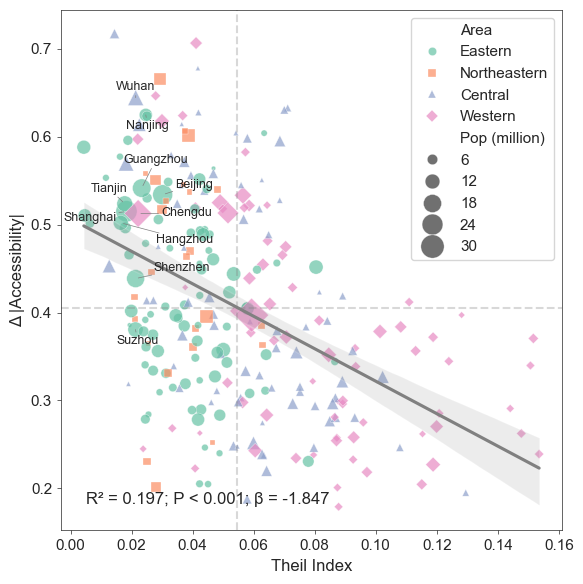

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager as font_manager
from adjustText import adjust_text
from sklearn.linear_model import LinearRegression
from scipy import stats

# Load the data
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\socio_acc_china_corr2.csv', encoding='gbk')
df = df.dropna()

# Set up the plot
plt.figure(figsize=(6, 6))
sns.set_theme(style="ticks")

# df['y_new'] = 1 - df['segregation_mean']

# x = '城镇化水平'
x = 'Theil index'
y = 'abs_different'

# Calculate R² and p-value
X = df[x].values.reshape(-1, 1)
y_data = df[y].values
model = LinearRegression()
results = model.fit(X, y_data)
r2 = model.score(X, y_data)
coefficient = model.coef_[0]

# Calculate p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df[y])

# Define area order
area_order = ["Eastern", "Northeastern", "Central", "Western"]

# Ensure DataFrame's Area column is ordered
df['Area'] = pd.Categorical(df['Area'], categories=area_order, ordered=True)

# Create the scatter plot
scatter = sns.scatterplot(
    data=df,
    x=x,
    y=y,
    size='Pop (million)',
    hue='Area',
    style='Area',
    markers={"Eastern": "o", "Northeastern": "s", "Central": "^", "Western": "D"},
    palette=sns.color_palette("Set2"),
    sizes=(10, 300),
    alpha=0.7,
    hue_order=area_order,
    style_order=area_order
)

# Add mean lines
plt.axvline(df[x].mean(), color='gray', linestyle='--', alpha=0.3)
plt.axhline(df[y].mean(), color='gray', linestyle='--', alpha=0.3)

# Add regression line using sns.regplot
sns.regplot(data=df, x=x, y=y, scatter=False, color='gray', order=1, line_kws={'linestyle': '-'})

# Select cities to label
# top5_gini = df.nlargest(5, x)['cities'].tolist()
# top5_resident = df.nlargest(10, y)['cities'].tolist()
# sample = df.nlargest(10, 'Pop (million)')['cities'].tolist()
topcity = ['Beijing', 'Shanghai', 'Shenzhen', 'Guangzhou', 'Hangzhou', 
                  'Nanjing', 'Suzhou', 'Wuhan', 'Chengdu', 'Tianjin']
cities_to_label = set(topcity)

# Add labels for selected cities
texts = []
for i, row in df.iterrows():
    if row['cities'] in cities_to_label:
        text = plt.text(row[x], row[y], str(row['cities']), 
                       fontsize=9, ha='center', va='center')
        texts.append(text)

# Adjust text positions to avoid overlaps
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5), pull_threshold=20,expand=(1.5, 1.5))

# Customize labels and title
plt.xlabel('Theil Index', fontsize=12)
plt.ylabel('Δ |Accessibility|', fontsize=12)
plt.legend(loc='upper right')

for spine in scatter.spines.values():
    spine.set_linewidth(0.5)
scatter.tick_params(width=0.5, length=3)
scatter.legend(frameon=True)

# Add R² and p-value to the plot
if p_value < 0.001:
    p_value_text = "P < 0.001"
else:
    p_value_text = f"P = {p_value:.3f}"
    
plt.text(0.05, 0.05, f'R² = {r2:.3f}; {p_value_text}; β = {coefficient:.3f}', 
         transform=plt.gca().transAxes, fontsize=12)

# Adjust layout and show
plt.tight_layout()
plt.show()

In [25]:
std_err

0.04114784802178283

C:\Users\浩然\AppData\Local\Temp\ipykernel_23116\2941521546.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gini_means = df.groupby('Area_ordered')['gini'].mean()
C:\Users\浩然\AppData\Local\Temp\ipykernel_23116\2941521546.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp =sns.boxplot(x="Area_ordered", y="socio-accessibility",


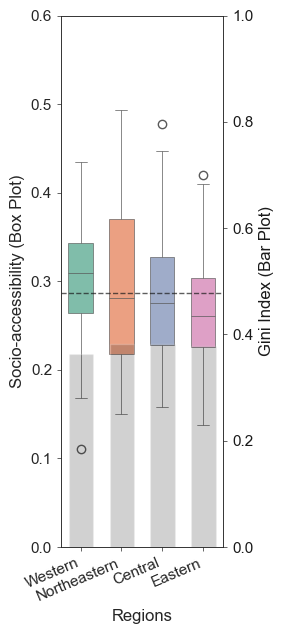

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\socio_acc_gini_by_city.csv', encoding='gbk')

# 计算每个地区的中位数
medians = df.groupby('Area')['socio-accessibility'].median().sort_values(ascending=False)

# 创建一个新的列，用于排序
df['Area_ordered'] = pd.Categorical(df['Area'], categories=medians.index, ordered=True)

# 计算每个地区的平均 Gini 值
gini_means = df.groupby('Area_ordered')['gini'].mean()

# 设置样式
sns.set_theme(style="ticks", palette="pastel")

# 创建图形
fig, ax1 = plt.subplots(figsize=(3, 6.5))

# 绘制排序后的箱线图
bp =sns.boxplot(x="Area_ordered", y="socio-accessibility",
            palette='Set2',
            data=df, ax=ax1,
            linewidth=0.5,
            width=.6)

# 设置箱线图的透明度
for patch in bp.patches:
    patch.set_alpha(0.9)

# 设置左侧y轴标签
ax1.set_xlabel('Regions', fontsize=12)
ax1.set_ylabel('Socio-accessibility (Box Plot)', fontsize=12)

# 创建右侧y轴
ax2 = ax1.twinx()

# 绘制 Gini 的条形7图
bar_width = 0.6
bar_positions = range(len(gini_means))
ax2.bar([p + bar_width/50 for p in bar_positions], gini_means.values, 
        width=bar_width, alpha=0.2, 
        color='k', 
        # palette='RdPu_r',
        label='Gini')

# 设置右侧y轴标签
ax2.set_ylabel('Gini Index (Bar Plot)', fontsize=12, color='k')
ax2.tick_params(axis='y', labelcolor='k')

# 设置 y 轴范围
ax1.set_ylim(0, 0.6)
ax2.set_ylim(0, 1.0)


# 旋转x轴标签
plt.setp(ax1.get_xticklabels(), rotation=23, ha='right')

# 添加平均值虚线
place_median = df['socio-accessibility'].mean()
median_line = ax1.axhline(place_median, color='k', linestyle='--', linewidth=1, label=f'Mean socio-accessibility = {place_median:.3f}', alpha=0.7)


# 减小边框线条粗细
for spine in ax1.spines.values():
    spine.set_linewidth(0.5)
ax1.tick_params(width=0.5, length=3)

for spine in ax2.spines.values():
    spine.set_linewidth(0.5)
ax2.tick_params(width=0.5, length=3)

# sns.despine(bottom=False, left=True, right=True)

# Create legend
# lines1, labels1 = ax1.get_legend_handles_labels()
# ax1.legend(lines1, labels1, loc='upper left', fontsize=11, frameon=False)

# 调整布局并显示图形
plt.tight_layout()

plt.savefig(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\figure\region_with_gini_bar_dual_axis.svg', dpi=600, bbox_inches='tight')

plt.show()

In [133]:
len(df)

259

## OSL

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

# 读取数据
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\socio_acc_china_corr2.csv', encoding='gbk')
df = df.dropna()

# 准备自变量和因变量
X = df.iloc[:,12:]
y = df['socio-accessibility']

# 计算人口的对数
pop_col = 'Pop (million)'  # 请替换为实际的人口列名
if pop_col in X.columns:
    X[pop_col] = np.log(X[pop_col])

# 对人口密度和经济发展水平进行归一化
scaler = MinMaxScaler()
density_col = '人口密度'  # 请替换为实际的列名
economy_col = '经济发展水平'  # 请替换为实际的列名

if density_col in X.columns:
    X[density_col] = scaler.fit_transform(X[[density_col]])
if economy_col in X.columns:
    X[economy_col] = scaler.fit_transform(X[[economy_col]])

# 添加常数项
X = sm.add_constant(X)

# 运行OLS回归
model = sm.OLS(y, X).fit()

print(model.summary())

# 获取显著性水平的变量
significance_level = 0.05
significant_vars = []
p_values = model.pvalues

print("\n显著变量 (p < 0.05):")
print("变量名称         p值")
print("-" * 30)
for var, p_val in p_values.items():
    if p_val < significance_level:
        print(f"{var:<15} {p_val:.4f}")
        significant_vars.append(var)

# 输出VIF值
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n显著变量的VIF值:")
print("-" * 30)
for var in significant_vars:
    vif = vif_data[vif_data['Variable'] == var]['VIF'].values[0]
    print(f"{var:<15} {vif:.4f}")

                             OLS Regression Results                            
Dep. Variable:     socio-accessibility   R-squared:                       0.094
Model:                             OLS   Adj. R-squared:                  0.079
Method:                  Least Squares   F-statistic:                     6.613
Date:                 Sun, 01 Dec 2024   Prob (F-statistic):           4.44e-05
Time:                         12:25:50   Log-Likelihood:                 344.87
No. Observations:                  261   AIC:                            -679.7
Df Residuals:                      256   BIC:                            -661.9
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

In [20]:
import pandas as pd

# 读取数据
df = pd.read_csv(r'D:\desk\housingprice.csv', encoding='gbk')

# 对Price列进行线性插值
df['Price'] = df['Price'].interpolate(method='linear')

df.to_csv(r'D:\desk\housingprice.csv', index=False)

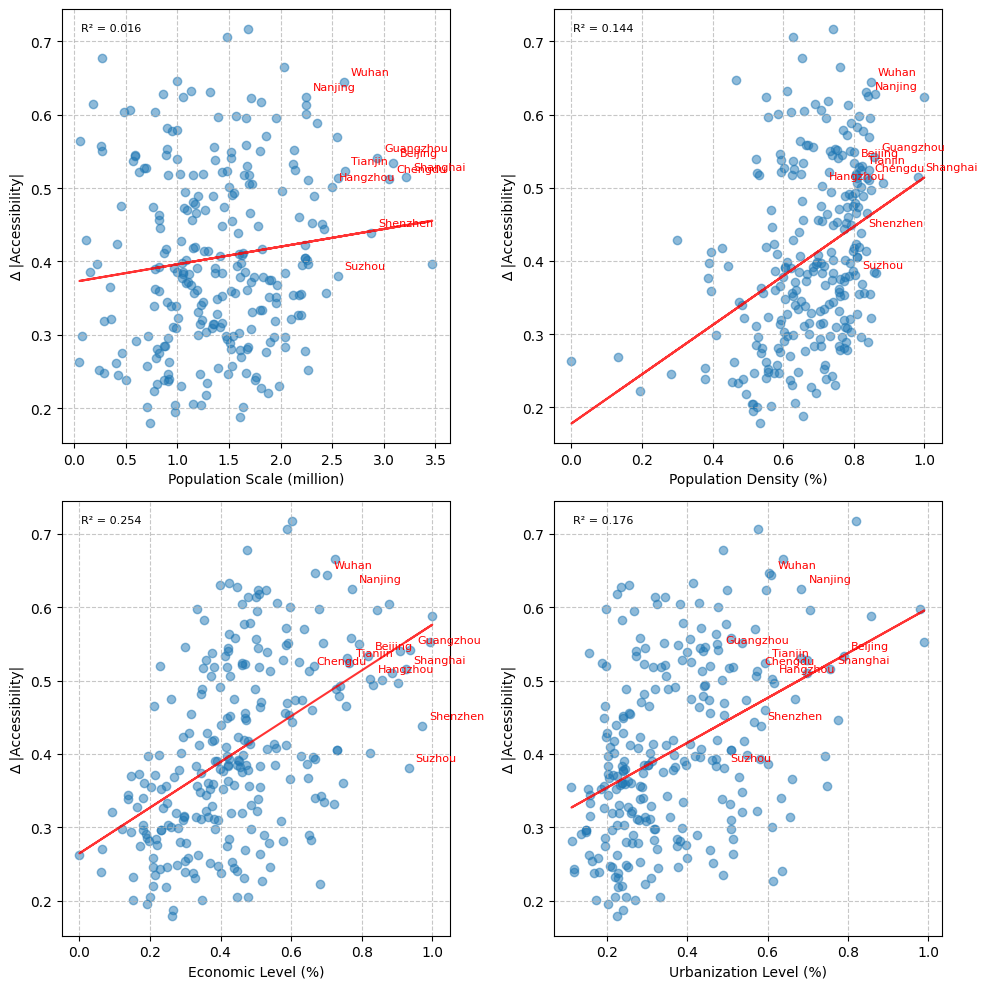

                            OLS Regression Results                            
Dep. Variable:          abs_different   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     37.75
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           8.22e-25
Time:                        12:21:48   Log-Likelihood:                 239.59
No. Observations:                 261   AIC:                            -469.2
Df Residuals:                     256   BIC:                            -451.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from sklearn.preprocessing import MinMaxScaler

# 设置中文字体
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\socio_acc_china_corr2.csv', encoding='gbk')
df = df.dropna()

# 准备自变量和因变量
X = df.iloc[:,12:]
y = df['abs_different']

# 数据预处理
scaler = MinMaxScaler()
pop_col = 'Population Scale (million)'
density_col = 'Population Density (%)'
economy_col = 'Economic Level (%)'

if pop_col in X.columns:
    X[pop_col] = np.log(X[pop_col])
if density_col in X.columns:
    X[density_col] = scaler.fit_transform(X[[density_col]])
if economy_col in X.columns:
    X[economy_col] = scaler.fit_transform(X[[economy_col]])

# 添加常数项
X = sm.add_constant(X)

# 运行OLS回归
model = sm.OLS(y, X).fit()

# 计算每个变量的子图数量
n_vars = X.shape[1] - 1  # 减去常数项
n_rows = (n_vars + 2) // 3  # 每行3个图，向上取整
n_cols = min(2, n_vars)

# 创建子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))
if n_rows > 1:
    axes = axes.flatten()
elif n_rows == 1:
    axes = [axes] if n_cols == 1 else axes.flatten()

# 定义要标注的城市
topcity = ['Beijing', 'Shanghai', 'Shenzhen', 'Guangzhou', 'Hangzhou',
           'Nanjing', 'Suzhou', 'Wuhan', 'Chengdu', 'Tianjin']
cities_to_label = set(topcity)

# 为每个自变量绘制图形
for i, var in enumerate(X.columns[1:]):  # 跳过常数项
    # 获取当前子图
    ax = axes[i]
    
    # 绘制散点图
    ax.scatter(X[var], y, alpha=0.5)
    
    # 添加趋势线
    z = np.polyfit(X[var], y, 1)
    p = np.poly1d(z)
    ax.plot(X[var], p(X[var]), "r-", alpha=0.8)
    
    # 为指定城市添加标签
    for city_name in cities_to_label:
        city_mask = df['cities'] == city_name
        if any(city_mask):
            x_val = X[var][city_mask].iloc[0]
            y_val = y[city_mask].iloc[0]
            ax.annotate(city_name, 
                       (x_val, y_val),
                       xytext=(5, 5), 
                       textcoords='offset points',
                       fontsize=8,
                       color='red')
    
    # 设置标题和标签
    # ax.set_title(f'{var}与因变量关系图')
    ax.set_xlabel(var)
    ax.set_ylabel('∆ |Accessibility|')
    
    # 添加R方值
    correlation = np.corrcoef(X[var], y)[0,1]
    r2 = correlation**2
    ax.text(0.05, 0.95, f'R² = {r2:.3f}', 
            transform=ax.transAxes, fontsize=8)
    
    # 添加网格
    ax.grid(True, linestyle='--', alpha=0.7)

# 删除多余的子图
if n_vars < len(axes):
    for j in range(n_vars, len(axes)):
        fig.delaxes(axes[j])

# 调整布局
plt.tight_layout()
plt.show()

# 打印回归结果
print(model.summary())

# 获取显著性水平的变量
significance_level = 0.05
significant_vars = []
p_values = model.pvalues

print("\n显著变量 (p < 0.05):")
print("变量名称 p值")
print("-" * 30)
for var, p_val in p_values.items():
    if p_val < significance_level:
        print(f"{var:<15} {p_val:.4f}")
        significant_vars.append(var)

C:\Users\浩然\AppData\Local\Temp\ipykernel_1448\951797034.py:42: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  scatter = sns.scatterplot(


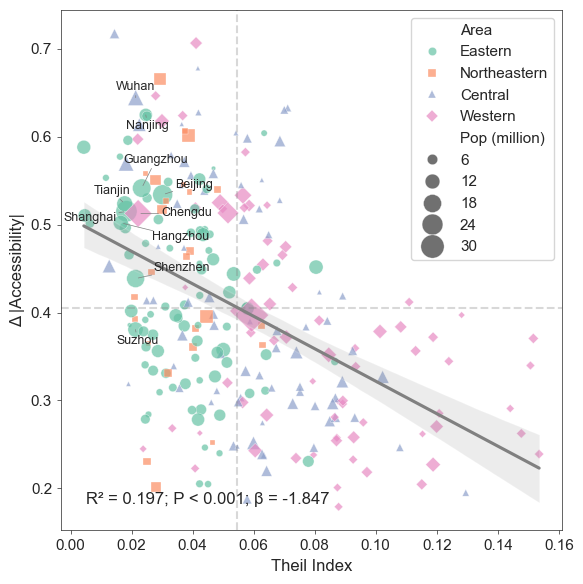

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager as font_manager
from adjustText import adjust_text
from sklearn.linear_model import LinearRegression
from scipy import stats

# Load the data
df = pd.read_csv(r'D:\A_Research\A_doing_research\20240918_segregation+GCN+weibo\data_analysis\socio_acc_china_corr2.csv', encoding='gbk')
df = df.dropna()

# Set up the plot
plt.figure(figsize=(6, 6))
sns.set_theme(style="ticks")

# df['y_new'] = 1 - df['segregation_mean']

# x = 'gini'
x = 'Theil index'
y = 'abs_different'

# Calculate R² and p-value
X = df[x].values.reshape(-1, 1)
y_data = df[y].values
model = LinearRegression()
results = model.fit(X, y_data)
r2 = model.score(X, y_data)
coefficient = model.coef_[0]

# Calculate p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df[y])

# Define area order
area_order = ["Eastern", "Northeastern", "Central", "Western"]

# Ensure DataFrame's Area column is ordered
df['Area'] = pd.Categorical(df['Area'], categories=area_order, ordered=True)

# Create the scatter plot
scatter = sns.scatterplot(
    data=df,
    x=x,
    y=y,
    size='Pop (million)',
    hue='Area',
    style='Area',
    markers={"Eastern": "o", "Northeastern": "s", "Central": "^", "Western": "D"},
    palette=sns.color_palette("Set2"),
    sizes=(10, 300),
    alpha=0.7,
    hue_order=area_order,
    style_order=area_order
)

# Add mean lines
plt.axvline(df[x].mean(), color='gray', linestyle='--', alpha=0.3)
plt.axhline(df[y].mean(), color='gray', linestyle='--', alpha=0.3)

# Add regression line using sns.regplot
sns.regplot(data=df, x=x, y=y, scatter=False, color='gray', order=1, line_kws={'linestyle': '-'})

# Select cities to label
# top5_gini = df.nlargest(5, x)['cities'].tolist()
# top5_resident = df.nlargest(10, y)['cities'].tolist()
# sample = df.nlargest(10, 'Pop (million)')['cities'].tolist()
topcity = ['Beijing', 'Shanghai', 'Shenzhen', 'Guangzhou', 'Hangzhou', 
                  'Nanjing', 'Suzhou', 'Wuhan', 'Chengdu', 'Tianjin']
cities_to_label = set(topcity)

# Add labels for selected cities
texts = []
for i, row in df.iterrows():
    if row['cities'] in cities_to_label:
        text = plt.text(row[x], row[y], str(row['cities']), 
                       fontsize=9, ha='center', va='center')
        texts.append(text)

# Adjust text positions to avoid overlaps
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5), pull_threshold=20,expand=(1.5, 1.5))

# Customize labels and title
plt.xlabel('Theil Index', fontsize=12)
plt.ylabel('Δ |Accessibility|', fontsize=12)
plt.legend(loc='upper right')

for spine in scatter.spines.values():
    spine.set_linewidth(0.5)
scatter.tick_params(width=0.5, length=3)
scatter.legend(frameon=True)

# Add R² and p-value to the plot
if p_value < 0.001:
    p_value_text = "P < 0.001"
else:
    p_value_text = f"P = {p_value:.3f}"
    
plt.text(0.05, 0.05, f'R² = {r2:.3f}; {p_value_text}; β = {coefficient:.3f}', 
         transform=plt.gca().transAxes, fontsize=12)

# Adjust layout and show
plt.tight_layout()
plt.show()